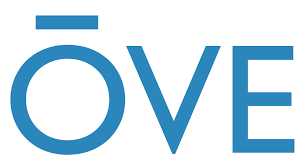


# ZOHO CRM API Documentation

-documentation V2: https://www.zoho.com/crm/developer/docs/api/v2/

<img src="https://www.thesmbguide.com/images/zoho-crm-1024x512-20201009.png" width="300"/>

**Compiled by:**
- Put together by Luciano André Lomelin Montalvo 

## About this Notebook:

The purpose of this notebook is to make it easy to understand and use the ZOHO CRM API.


## Important Definitions:

- **What is a CRM?**: Customer relationship management ( CRM) is a process in which a business or other organization administers its interactions with customers, typically using data analysis to study large amounts of information.

- **Rest API** (Representational State Transfer Application Programming Interface): Is a set of rules and conventions for building and interacting with web services, which facilitates the interaction between systems on the internet, enabling the connectivity and communcation. REST APIs use the HTTP protocol to communicate between the client and the server using methods such as: GET, POST, PUT, PATCH and DELTE.

    - Representations: when the client requests a resource, the server sends back the state of the resource in a format that the client can handle, such as: JSON or XML. Following the same logic the request can also be done in JSON or XML. 


- **Bulk API**: Commonly used in CRM systems such as ZOHO, they allow you to fetch a large sets of data, such as taking a backup it works in an asynchronous manner. in the case of Zoho the result sets will be available in CSV or ICS formats. Because It is an async operation, you won't have to wait for the operation to complete, instead you can, check back for results a later time. 

- **OAuth 2.0**: It is an open standard for authorization that allows third-party services to exchange user information without exposing user passwords. 


## Overview Zoho CRM API:

- Zoho CRM API:

    - Rest API: Integrate Zoho CRM Modules with any third-party application. 

    - Bulk APIs: Push and retrieve data from Zoho CRM in bulk using a set of asynchronous APIs 

    - Notification APIs: Get notified whenever a data change occurs inside your CRM.

    - Query APIs: Fetch records using the SELECT query (SQL syntax) from Zoho CRM



# Table of Contents:

1. [OAuth2.0](#oauth2.0)
   1. [Important Terminology](#important-terminology)
   2. [Tokens](#tokens)
   3. [Scopes](#scopes)
      1. [Available Scopes](#available-scopes)
      2. [Group Scopes](#group-scopes)
      3. [Separate Scopes](#separate-scopes)
   4. [Steps for OAuth process](#steps-for-the-oauth20-process)
      1. [Registering a Client](#registering-a-client)
      2. [Making the Authorization Request](#making-the-authorization-request)
      3. [Generate Access Token and Refresh Token](#generate-access-token-and-refresh-token)
      4. [Refreshing your Access Tokens](#refresing-your-access-tokens)

2. [API Limits](#api-limits)
3. [CORS Support](#cors-support)
4. [HTTP Request Methods](#http-request-methods)
5. [Response Structure](#response-structure)
6. [Rest API](#rest-api)
   1. [Modules API](#modules-api)
      1. [Modules API GET Method](#modules-api-get-method)
   2. [Organization API](#organization-api)
      1. [Organization API GET Method](#organization-api-get-method)
      2. [Organization Photo POST Method](#organization-photo-post-method)
      3. [Organization Photo GET Method](#organization-photo-get-method)
      4. [Organization Photo DELETE Method](#organization-photo-delete-method)
   3. [Users API](#users-api)
      1. [User (POST Method)](#user-post-method)
      2. [Users (GET Method)](#users-get-method)
      3. [User (UPDATE Method)](#user-update-method)
      4. [User (DELETE Method)](#user-delete-method)

   4. [Roles API](#roles-api)
      1. [Roles (GET Method)](#roles-get-method)
   
   5. [Territories API](#territories-api)
      1. [Territories API (GET Method)](#territories-get-method)
   
   6. [Meta Data API](#meta-data-api)
      1. [Modules (GET Method)](#modules-get-method)
      2. [Fields (GET Method)](#fields-get-method)
      3. [Layouts (GET Method)](#layouts-get-method)
      4. [Related Lists (GET Method)](#related-lists-get-method)
      5. [Custom Views (get Method)](#custom-views-get-method)
   7. [Records API](#records-api)
      1. [Records (GET Method)](#records-get-method)
      2. [Records (POST Method)](#records-post-method)
      3. [Records (PUT Method)](#records-put-method)
      4. [Upsert Records (POST Method)](#upsert-records-post-method)
      5. [Records (DELETE Method)](#records-delete-method)
      6. [Convert Lead (POST Method)](#convert-lead-post-method)
      7. [List of Deleted Records (GET Method)](#list-of-deleted-records-get-methods)
      8. [Search Records (GET Method)](#search-records-get-method)
   8. [Records API Using External ID](#records-api-using-external-id)
   9. [Subform API](#subform-api)
      1. [Subform Data (GET Method)](#subform-data-get-method)
      2. [Subform Data (POST Method)](#subform-data-post-method)
      3. [Subform Data (PUT Method)](#subforms-data-put-method)
   10. [Linking Module API](#linking-module-api)
   11. [Related Lists API](#related-lists-api)
       1. [Related Records Data (GET Method)](#related-records-data-get-method)
       2. [Related Records (PUT Method)](#related-records-put-method)
       3. [Delink Related Recoreds (DELETE Method)](#delink-related-records-delete-method)
   12. [Related Records API Using External ID](#related-records-api-using-external-id)
   13. [Contact Roles API](#contact-roles-api)
       1. [Contact Roles (POST Method)](#contact-roles-get-method)
   14. [Blueprint API](#blueprint-api)
       1. [Blueprint Details](#blueprint-details-get-method)
   15. [Variables API](#variables-api)
       1. [Variables Data (GET Method)](#variables-data-get-method)
   16. [Notes API](#notes-api)
       1. [Notes Data (GET Method)](#notes-data-get-method)
   17. [Tags API](#tags-api)
       1. [Tags List (GET Method)](#tags-list-get-method)
   18. [Photos & Attachments API](#photos--attachements-api)
   19. [Mass Update API](#mass-update-api)
   20. [Currencies API](#currencies-api)
   21. [Files API](#files-api)
   22. [Share API](#share-api)







# Migration to V2.0 Overview

The current version of the API is V2.0, version V1.0 reached its end of life on 31 December, 2019.



# OAuth2.0 
[OAuth2.0](https://www.zoho.com/crm/developer/docs/api/v2/oauth-overview.html)

- Zoho CRM API used the OAuth protocol for authentication. This means to get delegated access to protected resources in Zoho via an API.  Without having to use a password. 

- Users can revoke the client's delegated access with ease and give access only to the chosen resources. 

- Diagram OAuth process:
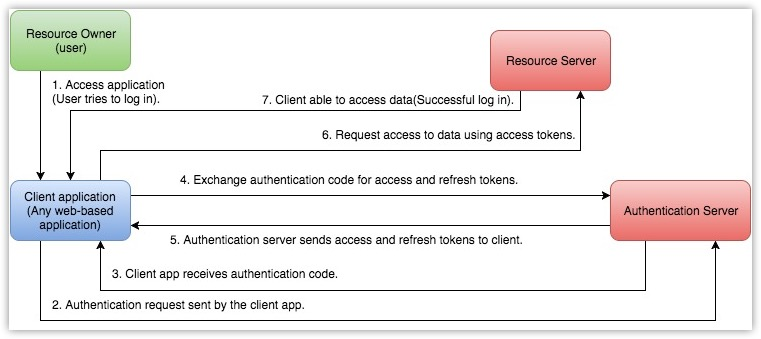

## Important terminology:

- **Protected resources**: Zoho CRM resources: Leads, Contacts, Deals...

- **Resource server**: the Zoho CRM server that hosts protected resources. 

- **Resource owner**: any user of your account who can grant access to resources, e.g: give access to Deals 

- **Client**: the application that sends requests to the API on behalf of the end-user. 

- **Client ID**: the key (ID) generated for the connected application 

- **Client Secret**: The secret generated for the application 

- **Authentication server**: It is the server that provides you with the token, in this case (Zoho CRM authorization server)

- **Authentication code**: A temporary token tthat is sent to the client via the browser. The client will send this code to the authorization server to obtain access and referesh tokens

## Tokens

* Do not expose the access tokens nor the refresh tokens, like in a github repo or a code that everyone can see, because with it people can **access your protected resources**

- **Access Token**: It is a temporary token (expires), that gives the client access to the protected resources that the Resource owner granted for the client's application. This type of token expires in one hour. 

- **Refresh Token**: It is a token used to obtain new access tokens (doesn't expire)

## Scopes 
[Scopes](https://www.zoho.com/crm/developer/docs/api/v2/scopes.html)

On the Zoho CRM API there are selected scopes, which control the type of resource that the client can see. When a token is created, it contains the scopes (resources) to which the application can access. e.g: a scopte to load the contents of a lead.

    example format: scope=service_name.scope_name.operation_type

**Structure of the scope in Zoho CRM:**

Scopes in Zoho CRM APIs consist of three elements: the service name, scope name, and operation type. The format used to define a scope is scope=service_name.scope_name.operation_type. For example, 

    ZohoCRM.modules.ALL

is a scope where:
- 'ZohoCRM' is the service API name,
- 'modules' is the scope name,
- 'ALL' signifies the operation type, granting full access to all operations within that scope.

### Available Scopes:

- **users**:
    Associated methods 
    - users.ALL -> grants full access to the related operations including: viewing, creating, updating, deleting user data. 

- **org (Orgnization)**
    Associated methods:
    - org.ALL -> complete access to orgnization-related data

- **settings**
    This is a broad scope that includes sub-scopes for various settings like territories, custom views, fields, layouts, macros, roles profiles and more. each allows specidic operations related to that setting:
    Associated methods:
    - settings.ALL
    - settings.territories
    - settings.custom_views
    - settings.related_lists
    - settings.modules
    - settings.variables
    - settings.tags
    - settings.layouts
    - settings.macros
    - settings.custom_links
    - settings.custom_buttons 
    - settings.roles
    - settings.profiles 
    - settings.currencies. 

- **modules**
    Related to Zoho CRM modules (categories of data) such as: leads, contacts, deals, accounts. etc. 
    Associated methods:
        - modules.ALL
        - modules.approvals
        - modules.leads 
        - modules.accounts
        - modules.contacts
        - modules.deals
        - modules.campaigns 
        - modules.tasks
        - modules.products
        - modules.vendors 
        - modules.pricebooks
        - modules.quotes
        - modules.salesorder
        - modeules.purchaseorders
        - modules.invoices 
        - modules.custom
        - modules.dashboards
        - modules.notes 
        - modules.activities 
        - modules.search 

- **bulk**
    These scopes are for operations that involve bulk data, such as reading or creating data in bulk.
    Associated methods:
    - bulk.ALL
    - bulk.READ
    - bulk.CREATE 

- **notifications**
    manada notifications:
    Associated methods:
    - notifications.READ
    - notifications.CREATE
    - notifications.UPDATE 
    - notifications.DELETE 

- **coql**
    This scope is used for read operations using the COQL (CRM Object Query Language)
    Associated methods:
    coql.READ. 


### Group scopes
It can include many scopes, for instance it can allow the user to read, create, update and delete records in all modules. Example

    https://accounts.zoho.com/oauth/v2/auth?scope=ZohoCRM.modules.ALL,ZohoCRM.settings.ALL&client_id={client_id}&response_type=code&access_type={"offline"or"online"}&redirect_uri={redirect_uri}


### Separate Scopes
Access data in a particular module without affecting other modules. 

    https://accounts.zoho.com/oauth/v2/auth?scope=ZohoCRM.modules.leads.ALL,ZohoCRM.modules.deals.ALL,ZohoCRM.settings.ALL&client_id={client_id}&response_type=code&access_type={"offline"or"online"}&redirect_uri={redirect_uri}

The above example only gives the user access to the leads and deals modules. 


## Steps for the OAuth2.0 process 

- **Overview**:
    - Client Registration 
    - Making the Authorization Request 
    - Generating Tokens 
    - Refreshing your Access tokens
    - Revoking Tokens 

### Registering a client
[Registering a Client](https://www.zoho.com/crm/developer/docs/api/v2/register-client.html)

Before you start the authorization process you have to have your application registered. 

- **To Register**:
    - Go to the <a href="https://api-console.zoho.com/">Zoho Developer Console</a>

    - **Choose a client type**:

    <img alt="types of clients" src="//www.zohowebstatic.com/sites/zweb/images/crm/1.-types-of-clients.jpg">

    - In the case of using a python application typically, you'll choose either a Web-Based Client or a Self Client, depending on whether your application has a user interface or operates as a backend service. You'll then use the Client ID and Client Secret along with OAuth 2.0 protocols to authenticate and interact with the Zoho CRM API.

    - **Enter the following details**: 
        - Client name: The name of the appalication you will register with zoho. Example: "MyCRMApp" or "SalesTracker" (do not use special characters)
        - Homepage URL: the URL of your application's homepage. Example: "https://www.mycrmapp.com"
        - Authorized Redirect URLs: This is a specific URL in your application where users will be redirected after authentication. An example could be "https://www.mycrmapp.com/oauth/callback".
    
    <img alt="types of clients" src="https://www.zohowebstatic.com/sites/zweb/images/crm/2.-create-new-client.jpg">


- **Click CREATE**
    - After you have created your application you will receive:
        - Client ID
        - Client Secret 

    <img alt="types of clients" src="https://www.zohowebstatic.com/sites/zweb/images/crm/3.-client-id-secret.jpg">


### Making the Authorization Request
[Making the Authorization Request](https://www.zoho.com/crm/developer/docs/api/v2/auth-request.html#self-client)

Users must authenticate the application to make API calls, this is done with an access token. this access token must be obtained through a grant token (authorization code). 


**I believe it is better explained how to generate an acces token on this video: https://youtu.be/qHmG4GEZ_TQ?si=hq-qI8MyrHXJVdxb**

There are two ways in which you can generate the grant token (authorization code):


- **Web-based application**:
    - for this you would have to make a Web-application (third party) with which users can make requests to Zoho, this would work as follows:
    - Create a login interface (login with zoho button)
    - redirect to zoho for authentication: this will send the user to the authorization url which includes client_id, the desired scope, response_type, access_type, and redirect_uri. Example:
        "https://accounts.zoho.com/oauth/v2/auth?scope=ZohoCRM.users.ALL&client_id={client_id}&response_type=code&access_type={"offline"or"online"}&redirect_uri={redirect_uri}" 

        - **Parameters on the url**:
            - scope: data that your application will be allowed to access 
            - client_id
            - redirect_uri: Callback URL that you specified during client registration 
            - response_type: here just enter code (response_type=code)
            - access_type: online or offline, if you want a refresh token set the value as offline

    - Once the access is grantes Zoho will redirect the user back to the redirect_uri, which sould be the part of your application that can handle the responses from Zoho. 
    - when the user is authorized Zoho's reponse will include an authorization code (grant token) as a parameter in the redirect URI (your application should capture this code), this grant token is temporary an serves as an exchange for the access token, there is also the refresh token.
     

- **Self-Client option**:
    - go to the developer console and create a self client
    - your client ID and secret will be displayed under the client secret tab. 
    - Generate an Authorization code for your application (generate code)
    - Enter the required scopes for your applicatoin
    - select time duration for which the grant token is valid
    - select your orgnization 
    - once you have this, the system will display the organization-specifict grant token, which again will be used to get the access token. 


### Generate Access Token and Refresh Token
[Generate Access Token and Refresh Token](https://www.zoho.com/crm/developer/docs/api/v2/access-refresh.html)

OAuth2.0 requests are authenticated with an access token, in order to get this token you have to simply do an HTTP request and include it an Authorization header along with the value of Bearer. 

- note: you must your use your domain-specific Zoho Account URL to generate access and refersh tokens:
    - for US: https://accounts.zoho.com (this is the one we need we can ignore the rest)

- **Steps to generate an access and refresh token:
    - Make a POST (this is an HTTP request! remember) request with teh specifict parameter:
        - request parameters:
            - grant_type
            - client_id
            - client_secret 
            - redirect_uri
            - code (the grant token)


    - you will get a Json response like the following: 

In [ ]:
{
    "access_token": "{access_token}",
    "refresh_token": "{refresh_token}",
    "api_domain": "https://www.zohoapis.com",
    "token_type": "Bearer",
    "expires_in": 3600
}

### Refresing your Access Tokens
[Refreshing your access tokens](https://www.zoho.com/crm/developer/docs/api/v2/refresh.html)

Make a post request with the following URL: 
    {Accounts_URL}/oauth/v2/token?refresh_token={refresh_token}&client_id={client_id}&client_secret={client_secret}&grant_type=refresh_token

If you want to revoke your refresh token, make a POST request with the following url 
    {Accounts_URL}/oauth/v2/token/revoke?token={refresh_token}



# API LIMITS 
[API Limits](https://www.zoho.com/crm/developer/docs/api/v2/api-limits.html)

API calls in Zoho CRM are associated with credits, which are deducted from your credit count, based on the type of the API call that you make as well as the performance and intensiveness. 

Refer to the following image for credit limit in a 24-hour window:

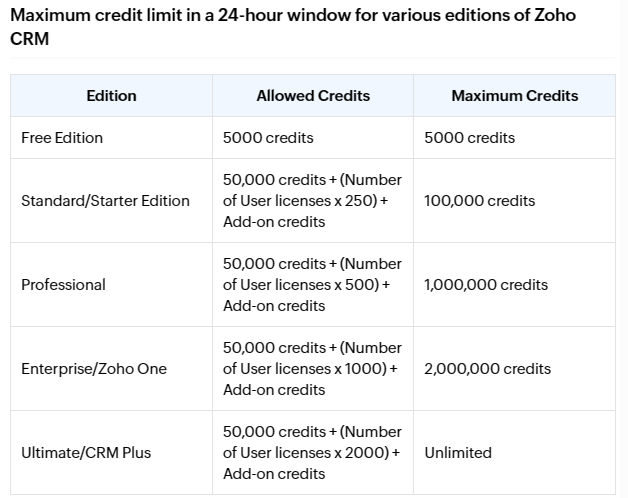

If you want to calculate the availabe credit limits based on your edition and the number of users refer to:

[Zoho Credits Calculator](https://www.zoho.com/crm/developer/docs/api/v2/api-limits.html#edition)






# CORS Support 
[CORS Support](https://www.zoho.com/crm/developer/docs/api/v2/CORSSupport.html)

Cross-origin resource sharing (CORS) is a browser security feature that restricts cross-origin HTTP requests initiated from scripts running in a browser. So when you want to make an API call from your web, you have to enable CORS 

Refer to: [CORS Support](https://www.zoho.com/crm/developer/docs/api/v2/CORSSupport.html)

# HTTP Request Methods:
[HTTP Request Methods](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods)

All Zoho CRM v2 APIs follow REST standards, i.e, they use the HTTP request methods GET, POST, PUT, DELETE etc,.

- GET: The GET method requests a representation of the specified resource (retrieve data).
- HEAD: the HEAD method asks for a response identical to a GET request but without the response body 
- POST: submits an entry to the specified resource. 
- PUT: update the existing resource 
- PATCH: update an specific detail of the resource. 
- DELETE: deletes a resource on a specific location


# Response Structure 
[Response Structure](https://www.zoho.com/crm/developer/docs/api/v2/response-structure.html)

For every call to the Zoho API, for every request, the API will return a JSON response, the response structrue will variy depending on the module: here are the structures for the different modules

For the different structures refer to:

- [Leads](https://www.zoho.com/crm/developer/docs/api/v2/leads-response.html)
- [Contacts](https://www.zoho.com/crm/developer/docs/api/v2/contacts-response.html)
- [Accounts](https://www.zoho.com/crm/developer/docs/api/v2/accounts-response.html)
- [Deals](https://www.zoho.com/crm/developer/docs/api/v2/deals-response.html)
- [Campaigns](https://www.zoho.com/crm/developer/docs/api/v2/campaigns-response.html)
- [Tasks](https://www.zoho.com/crm/developer/docs/api/v2/tasks-response.html)
- [Cases](https://www.zoho.com/crm/developer/docs/api/v2/cases-response.html)
- [Events](https://www.zoho.com/crm/developer/docs/api/v2/events-response.html)
- [Calls](https://www.zoho.com/crm/developer/docs/api/v2/calls-response.html)
- [Solutions](https://www.zoho.com/crm/developer/docs/api/v2/solutions-response.html)
- [Products](https://www.zoho.com/crm/developer/docs/api/v2/products-response.html)
- [Vendors](https://www.zoho.com/crm/developer/docs/api/v2/vendors-response.html)
- [Sales Orders](https://www.zoho.com/crm/developer/docs/api/v2/sales-orders-response.html)
- [Purchase Orders](https://www.zoho.com/crm/developer/docs/api/v2/purchase-orders-response.html)
- [Invoices](https://www.zoho.com/crm/developer/docs/api/v2/invoices-response.html)
- [Price Books](https://www.zoho.com/crm/developer/docs/api/v2/price-books-response.html)
- [Quotes](https://www.zoho.com/crm/developer/docs/api/v2/quotes-response.html)

# Rest API


# Modules API
[Modules API](https://www.zoho.com/crm/developer/docs/api/v2/modules-api.html)


## MODULES API GET METHOD

Zoho CRM has modules such as Leads, Accounts, Contacts, Deals, Forecast, etc. you can get the list of modules using a GET request




In [ ]:
GET /settings/module 

### Request details

- Request URL https://www.zohoapis.com/crm/v2/settings/modules
- Header Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.settings.ALL (or) scope=ZohoCRM.settings.modules.{operation_type}
- Operations: ALL (full data access), READ (get module data )

#### Sample Python request:

In [ ]:
def get_modules():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/modules'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


get_modules()

#The response will be an invalid token, but try giving it a valid access token 
#remember it is the access token not the grant token. 
#and you will get the list of modules in your Zoho CRM account.

**Breaking down the code**: 
This Python code defines a function `get_modules()` that makes a GET request to the Zoho CRM API to retrieve a list of modules in your Zoho CRM account. Here's a breakdown:

1. `def get_modules():` - This line defines a function named `get_modules`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/settings/modules'` - This line sets the URL for the Zoho CRM API endpoint that returns the list of modules.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `response = requests.get(url=url, headers=headers)` - This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

6. The `if response is not None:` check is used to ensure that a response was received from the server.

7. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

8. `print(response.json())` - This line prints the JSON body of the response. This should contain the list of modules if the request was successful.

9. `get_modules()` - This line calls the `get_modules` function.


#### Understanding the Response JSON Keys that you will get

- global_search_supported: Whether the module supports global search.

- deletable: Ability to delete records in the module.

- creatable: Capability to create new records.

- description: Description of the module.

- inventory_template_supported: Support for inventory templates.

- modified_time: Last modification time of the module.

- plural_label/singular_label: Plural and singular names of the module.

- triggers_supported: Support for triggers from workflows, etc.

- id: Unique identifier for the module.

- convertable: Conversion capability of module records.

- editable: Ability to edit records.

- emailTemplate_support: Email template support.

- api_supported: Accessible via API or not.

- profiles: Profiles with module access.

- filter_supported: Custom filter support.

- show_as_tab: Displayed as a tab in CRM UI.

- web_link: Web link of the module.

- api_name: API name of the module.

- quick_create: Quick record creation support.

- generated_type: How the module was created.

- feeds_required: Feeds enabled or not.

- scoring_supported: Eligibility for scoring processes.

- webform_supported: Support for creation via web forms.

- arguments: Parameters for Web-tab link.

- module_name: Display name of the module.

- business_card_field_limit: Field limit for business card details.

- parent_module: Details of the parent module.

#### Sample Response:
for the full response example refer to [Modules API](https://www.zoho.com/crm/developer/docs/api/v2/modules-api.html)




In [ ]:
{
    "modules": [
        {
            "global_search_supported": false,
            "deletable": false,
            "description": null,
            "creatable": false,
            "inventory_template_supported": false,
            "modified_time": null,
            "plural_label": "Home",
            "presence_sub_menu": false,
            "triggers_supported": false,
            "id": "4150868000000002173",
            "visibility": 1,
            "convertable": false,
            "editable": false,
            "emailTemplate_support": false,
            "profiles": [
                {
                    "name": "Administrator",
                    "id": "4150868000000026011"
                }
            ]
        }
    ],      
    "info": {
        "per_page": 200,
        "count": 1,
        "page": 1,
        "more_records": false
    }                       
}



# Organization API 

## Organization API GET Method 
[Organization API GET Method](https://www.zoho.com/crm/developer/docs/api/v2/get-org-data.html)

To get the organization data (GET method)

Request URL: https://www.zohoapis.com/crm/v2/org

Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52

Scope: scope=ZohoCRM.org.{operation_type}

Operation types: ALL (full acess to Organization data), READ (Get Organization data)

#### Example Python Request 

In [ ]:
def get_organization_details():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/org'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_organization_details()

**Breaking down the code**:
This Python code defines a function `get_organization_details()` that makes a GET request to the Zoho CRM API to retrieve details about your organization. Here's a breakdown:

1. `def get_organization_details():` - This line defines a function named `get_organization_details`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/org'` - This line sets the URL for the Zoho CRM API endpoint that returns the organization details.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `response = requests.get(url=url, headers=headers)` - This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

6. The `if response is not None:` check is used to ensure that a response was received from the server.

7. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

8. `print(response.json())` - This line prints the JSON body of the response. This should contain the organization details if the request was successful.

9. `get_organization_details()` - This line calls the `get_organization_details` function.

#### Response JSON keys 
- country, city, street, state, zip: Address details of the organization.

- photo_id: Unique ID for the organization's photo.

- description: Description of the organization.

- alias: Alias name of the organization.

- currency, currency_symbol, currency_locale, iso_code: Currency-related details.

- id: Unique ID of the organization.

- fax, mobile, primary_email, phone: Contact details of the organization.

- employee_count: Number of employees in the organization.

- website: Organization's website.

- primary_zuid: ZUID of the organization.

- zia_portal_id: Zia portal ID, if configured.

- time_zone: Organization's timezone.

- zgid: Unique ZGID of the organization.

- country_code: Country code of the organization.

- license_details: License details of the organization.

- company_name: Name of the company.

- privacy_settings, mc_status, gapps_enabled, translation_enabled, hipaa_compliance_enabled: Various settings and compliance details.

- domain_name: Domain name of the organization.

#### Possible Errors returned:

- INVALID_URL_PATTERN (HTTP 404): Incorrect request URL.

- OAUTH_SCOPE_MISMATCH (HTTP 401): Client lacks the required ZohoCRM.org.READ scope.

- NO_PERMISSION (HTTP 403): User lacks permission to read data.

- INTERNAL_ERROR (HTTP 500): Unhandled exception in the server.

- INVALID_REQUEST_METHOD (HTTP 400): Invalid HTTP method used for API URL.

- AUTHORIZATION_FAILED (HTTP 400): Insufficient privilege for reading organization data.

## Organization Photo (POST Method)
[Organization Photo (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/upload-org-img.html)

Endpoints:

In [ ]:
POST /org/photo

#### Request Details

Request URL: https://www.zohoapis.com/crm/v2/org/photo

Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52

Scope: scope=ZohoCRM.org.{operation_type}

Possible Operation Types:

- ALL - Full access to Organization data
- CREATE - Upload organization photo
- WRITE - Edit organization data

Parameters 

- file (the photo that you want to upload)

#### Example python request

In [ ]:
def upload_organization_photo():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/org/photo'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = {
        'file': open('/Users/abc-123/Desktop/img_1.png', 'rb')
    }

    response = requests.post(url=url, files=request_body, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

upload_organization_photo()

**Breaking down the code**
This Python code defines a function `upload_organization_photo()` that makes a POST request to the Zoho CRM API to upload a photo for your organization. Here's a breakdown:

1. `def upload_organization_photo():` - This line defines a function named `upload_organization_photo`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/org/photo'` - This line sets the URL for the Zoho CRM API endpoint that accepts the photo upload.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `request_body = {'file': open('/Users/abc-123/Desktop/img_1.png', 'rb')}` - This line opens the image file in binary mode and includes it in the request body.

6. `response = requests.post(url=url, files=request_body, headers=headers)` - This line sends a POST request to the URL specified, with the headers specified and the file included in the request body. The response from the server is stored in the `response` variable.

7. The `if response is not None:` check is used to ensure that a response was received from the server.

8. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

9. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

10. `upload_organization_photo()` - This line calls the `upload_organization_photo` function.


#### Sample Response

In [ ]:
{
	"message": "photo uploaded successfully",
	"details": {},
	"status": "success",
	"code": "SUCCESS",
}

#### Possible Errors Returned

- INVALID_DATA (HTTP 400): This occurs for invalid file types, absence of a file in the request, or if more than one file is added.

- FILE_SIZE_MORE_THAN_ALLOWED_SIZE (HTTP 415): The uploaded file exceeds the allowed size or resolution.

- CANNOT_PROCESS (HTTP 400): The image is rejected by Zia Image validator.

- INVALID_URL_PATTERN (HTTP 404): The request URL is incorrect.

- OAUTH_SCOPE_MISMATCH (HTTP 401): The client lacks the necessary scope for the operation.

- NO_PERMISSION (HTTP 403): The user does not have permission to upload the photo.

- INTERNAL_ERROR (HTTP 500): An unhandled exception occurred on the server.

- INVALID_REQUEST_METHOD (HTTP 400): An invalid HTTP method is used for the API request.

- AUTHORIZATION_FAILED (HTTP 400): T

## Organization Photo (GET Method)
[Organization Photo GET Method](https://www.zoho.com/crm/developer/docs/api/v2/upload-org-img.html)

#### Endpoints

In [ ]:
GET /org/photo

#### Request Details

- Request URL: {api-domain}/crm/{version}/org/photo
- Scope: scope=ZohoCRM.org.{operation_type}
- Possible Operation Types: 
    READ - Get organization photo or logo.
    ALL - Full access to Organization data.

#### Sample Request 

In [ ]:
import requests

url = "https://www.zohoapis.com/crm/v2/org/photo"
headers = {
    "Authorization": "Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf"
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Process the response
    print("Success:", response.content)
else:
    print("Error:", response.status_code, response.text)


#### Code Breakdown

This Python code is designed to retrieve the photo of an organization from the Zoho CRM API. Here's a breakdown:

1. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

2. `url = "https://www.zohoapis.com/crm/v2/org/photo"` - This line sets the URL for the Zoho CRM API endpoint that returns the organization's photo.

3. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

4. `response = requests.get(url, headers=headers)` - This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

5. The `if response.status_code == 200:` check is used to ensure that the request was successful. HTTP status code 200 means "OK" and indicates that the request was successful.

6. `print("Success:", response.content)` - If the request was successful, this line prints the word "Success" followed by the content of the response. This should be the organization's photo.

7. `else: print("Error:", response.status_code, response.text)` - If the request was not successful, this line prints the word "Error" followed by the HTTP status code and the text of the response. This can be useful for debugging if the request fails.


#### Possible Errors: 

- INVALID_REQUEST_METHOD (HTTP 400): Incorrect HTTP method used. Solution involves using the correct method.

- OAUTH_SCOPE_MISMATCH (HTTP 401): Lack of required scope (ZohoCRM.org.ALL or ZohoCRM.org.READ). Solution is to create a client with the correct scope.

- AUTHENTICATION_FAILURE (HTTP 401): Failed authentication, which can be resolved by correctly passing the access token.

- NO_PERMISSION (HTTP 403): Insufficient privilege to read the organization photo. The solution is to contact the administrator.

- INVALID_URL_PATTERN (HTTP 404): The request URL is incorrect. Correcting the URL will resolve this.

- INTERNAL_ERROR (HTTP 500): Server-side unhandled exception. Contacting the support team is advised for this error.

## Organization Photo (DELETE Method)
[Organization Photo (DELETE Method)](#https://www.zoho.com/crm/developer/docs/api/v2/get-org-img.html)

#### Endpoints


In [ ]:
DELETE /org/photo

#### Request Details 

- Request URL: {api-domain}/crm/{version}/org/photo
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.org.{operation_type}
- Possible Operation types:
    DELETE - Delete organization photo or logo.
    ALL - Full access to Organization data.

#### Sample Request

In [ ]:
import requests

url = "https://www.zohoapis.com/crm/v2/org/photo"
headers = {
    "Authorization": "Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf"
}

response = requests.delete(url, headers=headers)

# Check if the request was successful
if response.status_code == 204:
    print("Photo successfully deleted")
else:
    print("Error:", response.status_code, response.text)


#### Code Breakdown 

This Python code is designed to delete the photo of an organization from the Zoho CRM API. Here's a breakdown:

1. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

2. `url = "https://www.zohoapis.com/crm/v2/org/photo"` - This line sets the URL for the Zoho CRM API endpoint that deletes the organization's photo.

3. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

4. `response = requests.delete(url, headers=headers)` - This line sends a DELETE request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

5. The `if response.status_code == 204:` check is used to ensure that the request was successful. HTTP status code 204 means "No Content" and indicates that the request was successful and the server is not returning any content.

6. `print("Photo successfully deleted")` - If the request was successful, this line prints the message "Photo successfully deleted".

7. `else: print("Error:", response.status_code, response.text)` - If the request was not successful, this line prints the word "Error" followed by the HTTP status code and the text of the response. This can be useful for debugging if the request fails.



#### Sample response

In [ ]:
{
    "code": "SUCCESS",
    "details": {},
    "message": "Photo deleted",
    "status": "success"
}

#### Possible Errors:

- INVALID_REQUEST_METHOD (HTTP 400): Occurs when an invalid HTTP method is used. Solution involves using the correct method.

- OAUTH_SCOPE_MISMATCH (HTTP 401): Lack of required scope (ZohoCRM.org.ALL or ZohoCRM.org.DELETE). The solution is to create a client with the correct scope.

- AUTHENTICATION_FAILURE (HTTP 401): Failure in authentication, which can be resolved by correctly passing the access token.

- NO_PERMISSION (HTTP 403): Insufficient privilege to delete the photo. Contact the administrator for resolution.

- INVALID_URL_PATTERN (HTTP 404): Incorrect request URL. Correcting the URL will resolve this issue.

- INTERNAL_ERROR (HTTP 500): A server-side unhandled exception. Contacting the support team is advised for this error.


# Users API 

The users API is used to retrieve information about the CRM users, these users are the ones who are allowed to access and manage the CRM records such as standards and administrators. 


## User (POST Method)
[User (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/delete-org-img.html)


#### Purpose 

Add a user to your organization 

#### Endpoints 
    POST /users 

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/users
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.users.{operation_type}
- Possible Operation types:
    ALL - Full access to users
    CREATE - To create users

#### Sample Request 


In [ ]:
def add_user():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/users'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    user_list = list()

    user_object = {
        'role': '3409643000000026005',
        'first_name': 'Patricia',
        'last_name': 'Boyle',
        'profile': '3409643000000026011',
        'email': 'Patricia@abcl.com'
    }

    user_list.append(user_object)

    request_body['users'] = user_list

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

add_user()

#### Code Breakdown 

This Python code defines a function `add_user()` that makes a POST request to the Zoho CRM API to add a new user to your organization. Here's a breakdown:

1. `def add_user():` - This line defines a function named `add_user`.

2. `import requests, json` - These lines import the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data respectively.

3. `url = 'https://www.zohoapis.com/crm/v2/users'` - This line sets the URL for the Zoho CRM API endpoint that adds a new user.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `request_body = dict()` and `user_list = list()` - These lines initialize an empty dictionary and list respectively.

6. `user_object` is a dictionary that contains the details of the new user to be added.

7. `user_list.append(user_object)` - This line adds the `user_object` to the `user_list`.

8. `request_body['users'] = user_list` - This line adds the `user_list` to the `request_body` under the key 'users'.

9. `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))` - This line sends a POST request to the URL specified, with the headers specified and the request body converted to a JSON string and encoded to UTF-8. The response from the server is stored in the `response` variable.

10. The `if response is not None:` check is used to ensure that a response was received from the server.

11. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

12. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

13. `add_user()` - This line calls the `add_user` function.


- As you can see in the coede above, we append a dictionary, an input json would look as follows:

In [ ]:
{
  "users": [
    {
      "role": "554023000000015969",
      "first_name": "Patricia",
      "email": "Patricia@abcl.com",
      "profile": "554023000000015975",
      "last_name": "Boyle"
    }
  ]
}

#### JSON Input breakdown

- last_name (string): last name of the user 
- email (string): email ID of the user 
- role (string): the ID of the role you want to assign the user to get the roles refer to the [Roles API Section](https://www.zoho.com/crm/developer/docs/api/v2/get-roles.html) from the documentation or the Roles API Section on this Documentation: [Roles API Section](#roles-api)
- profile (string): specify the unique ID of the profile you want to assign the user. Refer to [Profiles API](https://www.zoho.com/crm/developer/docs/api/v2/get-profiles.html) or to the one on this Documentation: [Profiles API](#profiles-api)

#### Sample JSON Response



In [ ]:
{
  "users": [
    {
      "code": "SUCCESS",
      "details": {
        "id": "554023000000691003"
      },
      "message": "User added",
      "status": "success"
    }
  ]
}

#### Possible Errors

- INVALID_REQUEST_METHOD (HTTP 400): Occurs when an invalid HTTP method is used. Solution involves using the correct method.

- LICENSE_LIMIT_EXCEEDED (HTTP 400): Requests excess your license limit (discussed in [API Limits](#api-limits))

- DUPLICATE_DATA (HTTP 400): Failed to add user since same email id is already present 

- MANDATORY_NOT_FOUND (HTTP 400): Last Name is required 

- INVALID DATA (HTTP 400): an error with the data types or how you typed the value in your JSON request 

- FORBIDDEN (HTTP 403): you lack permissions to do the request. 

- INVALID_URL_PATTERN (HTTP 404): types the URL wrong 

- OAUTH_SCOPE_MISMATCH (HTTP 401): refer to [Scopes](#scopes)

- NO PERMISSION (HTTP 403): Permission denied to create

- INTERNAL ERROR (HTTP 500): Enternal server error (this exception is unhandled has to do with the Zoho end)

- INVALID_REQUEST_METHOD (HTTP 400): invalid HTTP method, probably a wrong endpoint (POST, GET, DELETE, etc..)

- AUTHORIZATION_FAILED (HTTP 400): the user does not have sufficient privilege to add new users. 

## Users (GET Method)
[Users GET Method](https://www.zoho.com/crm/developer/docs/api/v2/get-users.html)

#### Endpoints
    GET /users
    GET /users/{user_id}

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/users (general users) for a specific user use: https://www.zohoapis.com/crm/v2/users/{user_id}

- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52 || In order to get the recently modified users add a timestamp into your header, for example:  2019-07-25T15:26:49+05:30

- Scope: scope=ZohoCRM.users.{operation_type}

- Possible Operation types: 
    ALL - Full access to users
    READ - Get user data

#### Parameters:

- type (string): (specify the type)
    AllUsers - To list all users in your organization (both active and inactive users).
    ActiveUsers - To get the list of all the Active Users.
    DeactiveUsers - To get the list of all the users who were deactivated.
    ConfirmedUsers - To get the list of all the confirmed users.
    NotConfirmedUsers - To get the list of all the non-confirmed users.
    DeletedUsers - To get the list of deleted users.
    ActiveConfirmedUsers - To get the list of active users who are also confirmed.
    AdminUsers - To get the list of admin users.
    ActiveConfirmedAdmins - To get the list of active users with the administrative privileges and are also confirmed.
    CurrentUser - To get the current CRM user.

- page (integer): get the list of users from the specified page 

- per_page (integer): the number of records to be retrieved 

- ids (string): Represents the unique ID of the users 
        
#### Sample Request 

 

In [ ]:
def get_users():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/users'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-05-15T12:00:00+05:30'
    }

    parameters = {
        'type': 'AllUsers',
        'page': 1,
        'per_page': 10
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_users()

#### Response JSON 

for the sample response refer to [Sample Response GET Users](https://www.zoho.com/crm/developer/docs/api/v2/get-users.html)


## User (UPDATE Method)
[User UPDATE Method](https://www.zoho.com/crm/developer/docs/api/v2/update-user.html)

#### Purpose 
Update the details of a user 

#### Endpoints 
    PUT /users
    PUT /users/{user_id}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/users

- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52

- Scope: scope=ZohoCRM.users.{operation_type}

- Possible Operation types:
    ALL - Full access to users
    UPDATE - Update user data

#### Sample Request

In [ ]:
def update_users():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/users'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    user_list = list()

    user_object_1 = {
        'role': '3409643000000026005',
        'id': '3409643000000302031'
    }

    user_object_2 = {
        'id': '3409643000000302042',
        'email': 'user@abcl.com'
    }

    user_list.append(user_object_1)
    user_list.append(user_object_2)

    request_body['users'] = user_list

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_users()

def update_user():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/users/3409643000000302042'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    user_list = list()

    user_object = {
        'email': 'user@abcl.com',
        'role': '3409643000000026005'
    }

    user_list.append(user_object)

    request_body['users'] = user_list

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_user()

#### Code Breakdown 

This Python code defines two functions, `update_users()` and `update_user()`, that make PUT requests to the Zoho CRM API to update user details in your organization. Here's a breakdown:

1. `def update_users():` - This line defines a function named `update_users`.

2. `import requests, json` - These lines import the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data respectively.

3. `url = 'https://www.zohoapis.com/crm/v2/users'` - This line sets the URL for the Zoho CRM API endpoint that updates user details.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `request_body = dict()` and `user_list = list()` - These lines initialize an empty dictionary and list respectively.

6. `user_object_1` and `user_object_2` are dictionaries that contain the details of the users to be updated.

7. `user_list.append(user_object_1)` and `user_list.append(user_object_2)` - These lines add the `user_object_1` and `user_object_2` to the `user_list`.

8. `request_body['users'] = user_list` - This line adds the `user_list` to the `request_body` under the key 'users'.

9. `response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))` - This line sends a PUT request to the URL specified, with the headers specified and the request body converted to a JSON string and encoded to UTF-8. The response from the server is stored in the `response` variable.

10. The `if response is not None:` check is used to ensure that a response was received from the server.

11. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

12. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

13. `update_users()` - This line calls the `update_users` function.

The `update_user()` function is similar to the `update_users()` function, but it updates a single user. The URL includes the ID of the user to be updated, and the `user_object` contains the new details for the user.


#### Sample JSON request (input)

In [ ]:
{
  "users": [
    {
      "id": "554023000000691003",
      "phone": "123456789",
      "email": "newtocrm@zoho.com",
      "dob": "1990-12-31",
      "role":"79234000000031154",
      "profile":"79234000000031157",
      "country_locale": "en_US",
      "time_format": "HH:mm",
      "time_zone": "US/Samoa",
      "status": "active"
    }
  ]
}

#### Sample JSON Response

In [ ]:
{
  "users": [
    {
      "code": "SUCCESS",
      "details": {
        "id": "554023000000691003"
      },
      "message": "User updated",
      "status": "success"
    }
  ]
}

#### Possible Errors

for possible Error please refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/update-user.html#possible-errors)

## User (DELETE Method)
[User (DELTE Method)](https://www.zoho.com/crm/developer/docs/api/v2/delete-user.html)

#### Purpose 
To delete a user from your organization

#### Endpoints
    DELETE /users/{user_id}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/users/{user_id}
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.users.{operation_type}
- Operation types:
    ALL - Full access to users
    DELETE - Delete user data

#### Sample Request:




In [ ]:
def delete_user():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/users/3409643000000302042'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    response = requests.delete(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

delete_user()

#### Code Breakdown 

This Python code defines a function `delete_user()` that makes a DELETE request to the Zoho CRM API to delete a user from your organization. Here's a breakdown:

1. `def delete_user():` - This line defines a function named `delete_user`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/users/3409643000000302042'` - This line sets the URL for the Zoho CRM API endpoint that deletes a user. The number at the end of the URL is the ID of the user to be deleted.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `response = requests.delete(url=url, headers=headers)` - This line sends a DELETE request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

6. The `if response is not None:` check is used to ensure that a response was received from the server.

7. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

8. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

9. `delete_user()` - This line calls the `delete_user` function.


#### Sample JSON Response:


In [ ]:
{
  "users": [
    {
      "code": "SUCCESS",
      "details": {},
      "message": "User deleted",
      "status": "success"
    }
  ]
}

#### Possible Errors 
- Invalid Data (HTTP 400): When the user ID provided is invalid.
Cannot Delete Primary Contact (HTTP 400): Attempting to delete a primary contact.

- User Already Deleted (HTTP 400): Trying to delete a user that is already deleted.

- Insufficient Privileges (HTTP 400): The user attempting the deletion lacks necessary privileges.

- Incorrect URL Pattern (HTTP 404): Error due to using an incorrect URL pattern.

- OAuth Scope Mismatch (HTTP 401): Issue related to OAuth scope mismatch.
 
- Lack of Permission (HTTP 403): The user does not have permission for this operation.

- Internal Server Error (HTTP 500): A general internal server error.

- Invalid Request Method (HTTP 400): Using an incorrect request method for the API.

# Roles API 

In Zoho CRM, Administrators assign roles to the users. Roles, such as Managers, Sales Reps, Supervisors, Product Management Staff, etc., denote the different levels of employees in a company. Use this API to retrieve information about various roles in Zoho CRM.

## Roles (GET Method)
[Roles GET Method](https://www.zoho.com/crm/developer/docs/api/v2/get-roles.html)

#### Purpose 

retrieve details about roles in your organization 

#### Endpoints:
    GET /settings/roles
    GET /settings/roles/{role_id}

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/settings/roles + /{role_id}   (the role id part is if you want a specific roles)
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.settings.roles.{operation_type}
- Possible operation types:
    ALL - Full access to roles data
    READ - Retrieve roles data


#### Sample Request

In [ ]:
def get_roles():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/roles'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_roles()


def get_role():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/roles/3409643000000026008'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_role()

#### Code Breakdown 

This Python code defines two functions, `get_roles()` and `get_role()`, that make GET requests to the Zoho CRM API to retrieve information about roles in your organization. Here's a breakdown:

1. `get_roles()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/roles'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all roles.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `response = requests.get(url=url, headers=headers)`: This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_roles()`: This line calls the `get_roles` function.

2. `get_role()` function:

   - This function is almost identical to `get_roles()`, but it retrieves information about a specific role. The role is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/roles/3409643000000026008'`).
   
   - `get_role()`: This line calls the `get_role` function.

#### Sample Response:

In [ ]:

{
    "roles": [
        {
            "display_label": "CEO",
            "forecast_manager": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "share_with_peers": true,
            "name": "CEO",
            "description": "Users with this role have access to the data owned by all other users.",
            "id": "4150868000000026005",
            "reporting_to": null,
            "admin_user": true
        },
        {
            "display_label": "Manager",
            "forecast_manager": null,
            "share_with_peers": false,
            "name": "Manager",
            "description": "Users belonging to this role cannot see data for admin users.",
            "id": "4150868000000026008",
            "reporting_to": {
                "name": "Sales department Head",
                "id": "4150868000000231921"
            },
            "admin_user": false
        },
        {
            "display_label": "Sales rep",
            "forecast_manager": null,
            "share_with_peers": true,
            "name": "Sales rep",
            "description": "Lowest in the heirarchy",
            "id": "4150868000000231917",
            "reporting_to": {
                "name": "Manager",
                "id": "4150868000000026008"
            },
            "admin_user": false
        },
        {
            "display_label": "Sales department Head",
            "forecast_manager": null,
            "share_with_peers": true,
            "name": "Sales department Head",
            "description": "Sales department head",
            "id": "4150868000000231921",
            "reporting_to": {
                "name": "CEO",
                "id": "4150868000000026005"
            },
            "admin_user": false
        }
    ]
}

#### For possible errors refer to:

- [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-roles.html)

# Profiles API 

the profile that the administrator assigns to every user decides the user's level of access to the Zoho CRM data, with this API retrieve data about User profiles. 


## Profiles (GET Method)
[Profiles (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-profiles.html)

#### Endpoints
    GET /settings/profiles
    GET /settings/profiles/{profile_id}

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/settings/profiles + /{profile_id} || the profile_id part is if you wanna get a specific profile just as it happened with the Roles API. 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.settings.profiles.{operation_type}
- Possible Operation Types:
    ALL - Full access to profiles data
    READ - Retrieve profiles data

#### Sample Request



In [ ]:
def get_profiles():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/profiles'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_profiles()


def get_profile():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/profiles/3409643000000026011'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_profile()

#### Code Breakdown 

This Python code defines two functions, `get_profiles()` and `get_profile()`, that make GET requests to the Zoho CRM API to retrieve information about profiles in your organization. Here's a breakdown:

1. `get_profiles()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/profiles'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all profiles.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token. The 'If-Modified-Since' key is used to retrieve only profiles that have been modified since the specified date and time.
   
   - `response = requests.get(url=url, headers=headers)`: This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_profiles()`: This line calls the `get_profiles` function.

2. `get_profile()` function:

   - This function is almost identical to `get_profiles()`, but it retrieves information about a specific profile. The profile is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/profiles/3409643000000026011'`).
   
   - `get_profile()`: This line calls the `get_profile` function.

#### Sample JSON Response:


In [ ]:
{
    "profiles": [
        {
            "display_label": "Administrator",
            "created_time": null,
            "modified_time": "2020-04-01T12:57:59+05:30",
            "name": "Administrator",
            "modified_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "description": "This profile will have all the permissions. Users with Administrator profile will be able to view and manage all the data within the organization account by default.",
            "id": "4150868000000026011",
            "category": false,
            "created_by": null
        },
        {
            "display_label": "Standard",
            "created_time": null,
            "modified_time": "2020-04-01T12:34:58+05:30",
            "name": "Standard",
            "modified_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "description": "This profile will have all the permissions except administrative privileges.",
            "id": "4150868000000026014",
            "category": false,
            "created_by": null
        },
       {
            "display_label": "sample",
            "created_time": "2020-03-13T16:28:12+05:30",
            "modified_time": "2020-07-06T18:58:59+05:30",
            "name": "sample",
            "modified_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "description": "This is a sample profile",
            "id": "4150868000001623001",
            "category": true,
            "created_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            }
        }
    ]
}

#### Possible Errors

For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-profiles.html)

# Territories API

This API is helpful to get information from: Accounts, Contacts, and Deals, associated with a specific territory in your CRM (territory management)

## Territories (GET Method)
[Territories (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/territories.html)

#### Purpose 
Get the list of territories enabled for your organization

#### Endpoints
    GET /settings/territories

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/settings/territories
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.settings.territories.{operation_type}
- Possible Operation types:
    ALL - Full access to territories data
    READ - Read territories data

#### Sample Request 

In [ ]:
def get_territories():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/territories'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_territories()

#### Code break down

This Python code defines a function, `get_territories()`, that makes a GET request to the Zoho CRM API to retrieve information about territories in your organization. Here's a breakdown:

1. `def get_territories():` - This line defines a function named `get_territories`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/settings/territories'` - This line sets the URL for the Zoho CRM API endpoint that retrieves all territories.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `response = requests.get(url=url, headers=headers)` - This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

6. The `if response is not None:` check is used to ensure that a response was received from the server.

7. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

8. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

9. `get_territories()` - This line calls the `get_territories` function.

#### Sample JSON Response
*note: the full example is very large refer to [Full Request](https://www.zoho.com/crm/developer/docs/api/v2/territories.html), here is just a single item of a response:



In [ ]:
{
    "territories": [
        {
            "created_time": "2019-08-20T14:30:27+05:30",
            "modified_time": "2019-08-20T14:30:27+05:30",
            "manager": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "parent_id": null,
            "criteria": null,
            "name": "Zylker",
            "modified_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            },
            "description": "Organization Parent Territory",
            "id": "4150868000000236307",
            "created_by": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013"
            }
        }
    ]
}

#### Possible Errors
For possible Errors please refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/territories.html)

# Meta Data API

Returns the metadata for fields, layaouts and related listsos for a specific module. the module metadata in Zoho refers to specific details about modules, which means information about the structure and properties of the modules. 

## Modules (GET Method)
[Modules (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/module-meta.html)

#### Purpose
get the metadata for a specific module (specify the module name such as: leads, accounts, deals, etc..)

#### Endpoints
    GET /settings/modules/{module_api_name}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/settings/modules/{module_api_name}
- Supported modules:
    - Leads
    - Accounts
    - Contacts
    - Deals
    - Campaigns
    - Tasks
    - Cases
    - Events
    - Calls
    - Solutions
    - Products 
    - Vendors 
    - Price Books
    - Quotes 
    - Sales Orders 
    - Purchase Orders 
    - Invoices 
    - Custom 
    - Activities 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope 
    scope=ZohoCRM.settings.modules.READ
    (or)
    scope=ZohoCRM.settings.modules.ALL
    (or)
    scope=ZohoCRM.settings.ALL

#### Sample Request



In [ ]:
def get_module():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/modules/Accounts'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_module()

#### Code Break down 
This Python code defines a function, `get_module()`, that makes a GET request to the Zoho CRM API to retrieve information about the 'Accounts' module in your organization. Here's a breakdown:

1. `def get_module():` - This line defines a function named `get_module`.

2. `import requests` - This line imports the `requests` library, which is used for making HTTP requests.

3. `url = 'https://www.zohoapis.com/crm/v2/settings/modules/Accounts'` - This line sets the URL for the Zoho CRM API endpoint that retrieves information about the 'Accounts' module.

4. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

5. `response = requests.get(url=url, headers=headers)` - This line sends a GET request to the URL specified, with the headers specified. The response from the server is stored in the `response` variable.

6. The `if response is not None:` check is used to ensure that a response was received from the server.

7. `print("HTTP Status Code : " + str(response.status_code))` - This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.

8. `print(response.json())` - This line prints the JSON body of the response. This should contain the response from the server if the request was successful.

9. `get_module()` - This line calls the `get_module` function.

#### Sample JSON Response

In [ ]:
{
    "modules": [
        {
            "global_search_supported": true,
            "kanban_view": false,
            "deletable": true,
            "creatable": true,
            "filter_status": true,
            "modified_time": "2019-02-05T11:33:03+05:30",
            "plural_label": "Leads",
            "presence_sub_menu": true,
            "id": "3652397000000002175",
            "related_list_properties": {
                "sort_by": null,
                "fields": [
                    "First_Name",
                    "Last_Name",
                    "Full_Name",
                    "Company",
                    "Email",
                    "Lead_Source",
                    "Lead_Status",
                    "Phone"
                ],
                "sort_order": null
            },
            "$properties": [
                "$converted",
                "$approved",
                "$converted_detail",
                "$currency_symbol",
                "$approval",
                "$process_flow"
            ],
            "per_page": 10,
            "visibility": 1,
            "convertable": true,
            "editable": true,
            "emailTemplate_support": true,
            "profiles": [
                {
                    "name": "Administrator",
                    "id": "3652397000000026011"
                },
                {
                    "name": "Standard",
                    "id": "3652397000000026014"
                }
            ],
            "filter_supported": true,
            "display_field": "Full_Name",
            "search_layout_fields": [
                "Owner",
                "Company",
                "Email",
                "Phone",
                "Lead_Source",
                "Full_Name"
            ],
            "kanban_view_supported": true,
            "web_link": null,
            "sequence_number": 2,
            "singular_label": "Lead",
            "viewable": true,
            "api_supported": true,
            "api_name": "Leads",
            "quick_create": true,
            "modified_by": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "generated_type": "default",
            "feeds_required": false,
            "scoring_supported": true,
            "arguments": [],
            "module_name": "Leads",
            "business_card_field_limit": 5,
            "custom_view": {
                "display_value": "All Leads",
                "shared_type": null,
                "criteria": {
                    "comparator": "equal",
                    "field": "$converted",
                    "value": false
                },
                "system_name": "ALLVIEWS",
                "shared_details": null,
                "sort_by": null,
                "offline": true,
                "default": true,
                "system_defined": true,
                "name": "All Open Leads",
                "id": "3652397000000087501",
                "category": "shared_with_me",
                "fields": [
                    "Full_Name",
                    "Company",
                    "Email",
                    "Phone",
                    "Lead_Source",
                    "Owner",
                    "Prediction_Score"
                ],
                "favorite": null,
                "sort_order": null
            },
            "parent_module": {}
        }
    ]
}

#### Understanding the JSON response keys 

Here are definitions for some of the most relevant keys in the provided JSON:

1. `global_search_supported`: Indicates whether the global search feature is supported for this module.

2. `kanban_view`: Indicates whether the Kanban view is enabled for this module.

3. `deletable`: Indicates whether records in this module can be deleted.

4. `creatable`: Indicates whether new records can be created in this module.

5. `modified_time`: The time when the module was last modified.

6. `plural_label`: The name of the module in plural form.

7. `id`: The unique identifier of the module.

8. `related_list_properties`: Contains properties related to the list view of related records.

9. `$properties`: Contains properties related to the module's behavior and features.

10. `per_page`: The number of records displayed per page in the module.

11. `visibility`: The visibility level of the module.

12. `convertable`: Indicates whether records in this module can be converted to other types.

13. `editable`: Indicates whether records in this module can be edited.

14. `profiles`: Contains information about the profiles that have access to this module.

15. `display_field`: The field that is displayed in the module's list view.

16. `api_name`: The name of the module used in API calls.

17. `module_name`: The name of the module.

18. `custom_view`: Contains properties related to the custom view of the module.

#### Possible Errors

For possible Errors please refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/module-meta.html)

## Fields (GET Method)
[Fields (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/field-meta.html)

#### Purpose 
Get details of the layouts associated with a module


#### Endpoints
    GET /settings/fields?module={module_api_name}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/settings/fields?module={module_api_name}

- Supported modules: 
    - Leads 
    - Accounts
    - Contacts 
    - Deals
    - Campaigns 
    - Tasks 
    - Cases 
    - Events 
    - Calls
    - Solutions
    - Products 
    - Vendors 
    - Price Books 
    - Quotes 
    - Sales Orders 
    - Purchase Orders 
    - Invoices 
    - Custom 
    - Activites 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.settings.fields.READ
    (or)
    scope=ZohoCRM.settings.fields.ALL
    (or)
    scope=ZohoCRM.settings.ALL
- Parameters:
    - module(string): the name of the module of which you want to get the fields meta data, example: Vendors, Products. 

#### Sample Request 

In [ ]:
def get_fields():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/fields'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_fields()


def get_field():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/fields/3409643000000002589'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_field()

#### Code Break Down 

This Python code defines two functions, `get_fields()` and `get_field()`, that make GET requests to the Zoho CRM API to retrieve information about fields in the 'Leads' module of your organization. Here's a breakdown:

1. `get_fields()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/fields'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all fields in a specified module.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - The `parameters` dictionary contains the query parameters for the GET request. The 'module' key is followed by the name of the module ('Leads') for which the fields are to be retrieved.
   
   - `response = requests.get(url=url, params=parameters, headers=headers)`: This line sends a GET request to the URL specified, with the headers and parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_fields()`: This line calls the `get_fields` function.

2. `get_field()` function:

   - This function is almost identical to `get_fields()`, but it retrieves information about a specific field. The field is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/fields/3409643000000002589'`).
   
   - `get_field()`: This line calls the `get_field` function.

#### Sample JSON Response: 

The response is too long, refer to [JSON Response](https://www.zoho.com/crm/developer/docs/api/v2/field-meta.html)

#### Possible Errors:

For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/field-meta.html)

## Layouts (GET Method)
[Layouts (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/layouts-meta.html)

#### Purpose 
Get details of the layouts associated with a particular module 

#### Endpoints
    GET /settings/layouts?module={module_api_name}
    GET /settings/layouts/{layout_id}?module={module_api_name}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/settings/layouts?module={module_api_name}
- Supported modules:
    - Leads 
    - Accounts
    - Contacts 
    - Deals
    - Campaigns 
    - Tasks
    - Cases 
    - Events
    - Calls 
    - Solutions 
    - Products 
    - Vendors
    - Price Books
    - Quotes 
    - Sales Orders 
    - Purchase Orders 
    - Invoices
    - Custom
    - Activities 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.settings.layouts.READ
    (or)
    scope=ZohoCRM.settings.layouts.ALL
    (or)
    scope=ZohoCRM.settings.ALL
- Parameters:
    - module(string): name of the required module to get Layouts of, example: leads, Vendors

#### Sample Request 



In [ ]:
def get_layouts():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/layouts'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Contacts',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_layouts()


def get_layout():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/layouts/3409643000000091033'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Contacts',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_layout()

#### Code break down 
This Python code defines two functions, `get_layouts()` and `get_layout()`, that make GET requests to the Zoho CRM API to retrieve information about layouts in the 'Contacts' module of your organization. Here's a breakdown:

1. `get_layouts()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/layouts'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all layouts in a specified module.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - The `parameters` dictionary contains the query parameters for the GET request. The 'module' key is followed by the name of the module ('Contacts') for which the layouts are to be retrieved.
   
   - `response = requests.get(url=url, params=parameters, headers=headers)`: This line sends a GET request to the URL specified, with the headers and parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_layouts()`: This line calls the `get_layouts` function.

2. `get_layout()` function:

   - This function is almost identical to `get_layouts()`, but it retrieves information about a specific layout. The layout is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/layouts/3409643000000091033'`).
   
   - `get_layout()`: This line calls the `get_layout` function.

#### Sample JSON Response
The response is too long refer to [JSON Response](https://www.zoho.com/crm/developer/docs/api/v2/layouts-meta.html)

#### Possible Errors
For possbiel Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/layouts-meta.html)



## Related Lists (GET Method)
[Related Lists (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/related-list-meta.html)

#### Purpose
Get the related list meta data from a particular module 

#### Endpoints
    GET /settings/related_lists?module={module_api_name}

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/settings/related_lists?module={module_api_name}
- Supported modules:
    - Leads 
    - Accounts
    - Contacts 
    - Deals
    - Campaigns 
    - Tasks
    - Cases 
    - Events
    - Calls
    - Solutions
    - Products 
    - Vendors 
    - Price Books 
    - Quotes 
    - Sales Orders 
    - Purchase Orders 
    - Invoices 
    - Custom 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.settings.related_lists.READ
    (or)
    scope=ZohoCRM.settings.related_lists.ALL
    (or)
    scope=ZohoCRM.settings.ALL
- Parameters
    - module(string): name of the required module you want to get the lists of, example: Accounts, Contacts. 

#### Sample Request

In [ ]:
def get_related_lists():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/related_lists'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_related_lists()


def get_related_list():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/related_lists/3409643000000003771'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_related_list()

#### Code Break Down 
This Python code defines two functions, `get_related_lists()` and `get_related_list()`, that make GET requests to the Zoho CRM API to retrieve information about related lists in the 'Leads' module of your organization. Here's a breakdown:

1. `get_related_lists()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/related_lists'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all related lists in a specified module.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - The `parameters` dictionary contains the query parameters for the GET request. The 'module' key is followed by the name of the module ('Leads') for which the related lists are to be retrieved.
   
   - `response = requests.get(url=url, params=parameters, headers=headers)`: This line sends a GET request to the URL specified, with the headers and parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_related_lists()`: This line calls the `get_related_lists` function.

2. `get_related_list()` function:

   - This function is almost identical to `get_related_lists()`, but it retrieves information about a specific related list. The related list is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/related_lists/3409643000000003771'`).
   
   - `get_related_list()`: This line calls the `get_related_list` function.


#### Sample JSON Response
The response is too long, refer to [Sample JSON Response](https://www.zoho.com/crm/developer/docs/api/v2/related-list-meta.html)

#### Possible Errors 
For possible Errors, refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/related-list-meta.html)

## Custom Views (Get Method)
[Custom Views (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/custom-view-meta.html)

#### Purpose 
Get the custon views meta data from a module 

#### Endpoints 
    GET /settings/custom_views?module={module_api_name}
    GET /settings/custom_views/{custom_view_id}?module={module_api_name}

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/settings/custom_views?module={module_api_name}
- Supported Modules:
    - Leads
    - Accounts 
    - Contacts
    - Deals
    - Campaigns
    - Tasks 
    - Cases 
    - Events 
    - Calls 
    - Solutions 
    - Products 
    - Vendors 
    - Price Books 
    - Quotes
    - Sales Orders 
    - Purchase Orders 
    - Invoices 
    - Custom
    - Activities 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.settings.custom_views.READ
    (or)
    scope=ZohoCRM.settings.custom_views.ALL
    (or)
    scope=ZohoCRM.settings.ALL
- Parameters:
    module(string)

#### Sample Request 

In [ ]:
def get_custom_views():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/custom_views'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
        'page': 1,
        'per_page': 20
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_custom_views()


def get_custom_view():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/custom_views/3409643000000087501'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268'
    }

    parameters = {
        'module': 'Leads',
    }

    response = requests.get(url=url, params=parameters, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_custom_view()

#### Code Break Down 
This Python code defines two functions, `get_custom_views()` and `get_custom_view()`, that make GET requests to the Zoho CRM API to retrieve information about custom views in the 'Leads' module of your organization. Here's a breakdown:

1. `get_custom_views()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/settings/custom_views'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all custom views in a specified module.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - The `parameters` dictionary contains the query parameters for the GET request. The 'module' key is followed by the name of the module ('Leads') for which the custom views are to be retrieved. The 'page' and 'per_page' keys are used for pagination.
   
   - `response = requests.get(url=url, params=parameters, headers=headers)`: This line sends a GET request to the URL specified, with the headers and parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_custom_views()`: This line calls the `get_custom_views` function.

2. `get_custom_view()` function:

   - This function is almost identical to `get_custom_views()`, but it retrieves information about a specific custom view. The custom view is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/settings/custom_views/3409643000000087501'`).
   
   - `get_custom_view()`: This line calls the `get_custom_view` function.

#### Sample JSON Response

In [ ]:
{
    "custom_views": [
        {
            "display_value": "All Leads",
            "offline": true,
            "default": false,
            "system_name": "ALLVIEWS",
            "system_defined": true,
            "name": "All Open Leads",
            "id": "3652397000000087501",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Converted Leads",
            "offline": true,
            "default": false,
            "system_name": "CONVERTEDVIEWS",
            "system_defined": true,
            "name": "Converted Leads",
            "id": "3652397000000089005",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Email Opt Out",
            "offline": true,
            "default": true,
            "system_name": null,
            "system_defined": false,
            "name": "Email Opt Out",
            "id": "3652397000000538003",
            "category": "created_by_me",
            "favorite": null
        },
        {
            "display_value": "Junk Leads",
            "offline": true,
            "default": false,
            "system_name": "JUNKLEADVIEWS",
            "system_defined": true,
            "name": "Junk Leads",
            "id": "3652397000000149020",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Mailing Labels",
            "offline": true,
            "default": false,
            "system_name": "ALLVIEWS",
            "system_defined": true,
            "name": "Mailing Labels",
            "id": "3652397000000087503",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "My Converted Leads",
            "offline": true,
            "default": false,
            "system_name": "MYCONVERTEDVIEWS",
            "system_defined": true,
            "name": "My Converted Leads",
            "id": "3652397000000089007",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "My Leads",
            "offline": true,
            "default": false,
            "system_name": "MYVIEWS",
            "system_defined": true,
            "name": "My Leads",
            "id": "3652397000000087563",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Not Qualified Leads",
            "offline": true,
            "default": false,
            "system_name": "NOTQUALIFIEDLEADVIEWS",
            "system_defined": true,
            "name": "Not Qualified Leads",
            "id": "3652397000000149031",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Open Leads",
            "offline": true,
            "default": false,
            "system_name": "OPENLEADVIEWS",
            "system_defined": true,
            "name": "Open Leads",
            "id": "3652397000000149042",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Recently Created Leads",
            "offline": true,
            "default": false,
            "system_name": "RECENTLYCREATED",
            "system_defined": true,
            "name": "Recently Created Leads",
            "id": "3652397000000087509",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Recently Modified Leads",
            "offline": true,
            "default": false,
            "system_name": "RECENTLYMODIFIED",
            "system_defined": true,
            "name": "Recently Modified Leads",
            "id": "3652397000000087511",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Today's Leads",
            "offline": true,
            "default": false,
            "system_name": "today",
            "system_defined": true,
            "name": "Todays Leads",
            "id": "3652397000000087507",
            "category": "shared_with_me",
            "favorite": null
        },
        {
            "display_value": "Unread Leads",
            "offline": true,
            "default": false,
            "system_name": "UNREADVIEWS",
            "system_defined": true,
            "name": "Unread Leads",
            "id": "3652397000000087505",
            "category": "shared_with_me",
            "favorite": null
        }
    ],
    "info": {
        "per_page": 200,
        "default": "3652397000000538003",
        "count": 13,
        "translation": {
            "public_views": "Public Views",
            "other_users_views": "Other Users' Views",
            "shared_with_me": "Shared With Me",
            "created_by_me": "Created By Me"
        },
        "page": 1,
        "more_records": false
    }
}

#### Understanding the Response JSON Keys 

Here are definitions for some of the most relevant keys in the provided JSON:

1. `custom_views`: This is an array of objects, each representing a custom view in the 'Leads' module.

2. `display_value`: The name of the custom view as it is displayed in the Zoho CRM user interface.

3. `offline`: Indicates whether the custom view is available offline.

4. `default`: Indicates whether the custom view is the default view.

5. `system_name`: The system name of the custom view. This is typically a unique identifier used by Zoho CRM.

6. `system_defined`: Indicates whether the custom view is a system-defined view (true) or a user-defined view (false).

7. `name`: The name of the custom view.

8. `id`: The unique identifier of the custom view.

9. `category`: The category of the custom view. This can be 'shared_with_me', 'created_by_me', etc.

10. `favorite`: Indicates whether the custom view is marked as a favorite. This is null if the custom view is not marked as a favorite.

11. `info`: This object contains information about the custom views.

12. `per_page`: The number of custom views displayed per page in the Zoho CRM user interface.

13. `default`: The ID of the default custom view.

14. `count`: The total number of custom views.

15. `translation`: This object contains translations of the custom view categories.

16. `page`: The current page number.

17. `more_records`: Indicates whether there are more custom views that are not included in the current response.


#### Possible Errors 
For the Possible Erros, refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/custom-view-meta.html)

# Records API 

A record is an entity which stores all the information of a particular contact or company. this API, allows you to get, create, update, delete or search records. 

## Records (GET Method)
[Records (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-records.html)

#### Purpose 
Get the list of avialable records from a module 

#### Endpoints
    GET /{module_api_name}
    GET /{module_api_name}/{record_id}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name} + /{record_id} || this last part for a specific records 
- Supported Modules:
    - Leads 
    - Accounts 
    - Contacts 
    - Deals 
    - Campaigns 
    - Tasks
    - Cases 
    - Events 
    - Calls 
    - Solutions 
    - Products 
    - Vendors 
    - Price Books
    - Quotes 
    - Sales Orders 
    - Purchase Orders 
    - Invoices 
    - Activities 
    - custom modules:
        for custom modules use their respective API names in request URL: go to setup -> Developer Space -> APIs -> API Names. 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52, if you wanna see only the recently modified records add a time stamp like:  2019-07-25T15:26:49+05:30
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}

- Possible Module Names:
    refer to (Supported Modules)
- Possible Operation types:
    ALL - Full access to the record
    READ - Get records from the module
- Parameters:
    - fields(string): return specific field value, for example Email 
    - ids(string): retrieve specific records based on their unique ID
    - sort_order (string): if the return has to be in either ascending or descending order 
    - sort_by (string): the field you want to sort the records, for example Email.
    - converted (string): list of converted records 
    - approved (string): the list of approved records
    - page(integer): get only the records from the respective pages 
    - per_page(integer): list of availabe records in a page 
    - cvid (long): get the list of records in a custom view 
    - territory_id(string): list of records in a teritory 

#### Sample Request 





In [ ]:
def get_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'approved': 'both',
        'converted': 'both',
        'cvid': '3409643000002804006',
        'ids': '3409643000002804010,3409643000002804109',
        'uid': '3409643000002804154',
        'fields': 'Last_Name,Email',
        'sort_by': 'Email',
        'sort_order': 'desc',
        'page': '1',
        'per_page': '100',
        'startDateTime': '2020-05-15T12:00:00+05:30',
        'endDateTime': '2020-10-15T12:00:00+05:30',
        'territory_id': '3409643000002804205',
        'include_child': 'false',
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


get_records()


def get_record():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002804010'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'approved': 'both',
        'converted': 'both',
        'cvid': '3409643000002804006',
        'uid': '3409643000002804154',
        'fields': 'Last_Name,Email',
        'startDateTime': '2020-05-15T12:00:00+05:30',
        'endDateTime': '2020-10-15T12:00:00+05:30',
        'territory_id': '3409643000002804205',
        'include_child': 'false',
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


get_record()

#### Code Break Down
This Python code defines two functions, `get_records()` and `get_record()`, that make GET requests to the Zoho CRM API to retrieve information about leads. Here's a breakdown:

1. `get_records()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads'`: This line sets the URL for the Zoho CRM API endpoint that retrieves all leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token. The 'If-Modified-Since' key is followed by a date and time, and the server will only return leads that have been modified since this date and time.
   
   - The `parameters` dictionary contains the query parameters for the GET request. These parameters can be used to filter and sort the leads that are returned, and to specify which fields should be included in the response.
   
   - `response = requests.get(url=url, headers=headers, params=parameters)`: This line sends a GET request to the URL specified, with the headers and parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_records()`: This line calls the `get_records` function.

2. `get_record()` function:

   - This function is almost identical to `get_records()`, but it retrieves information about a specific lead. The lead is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/Leads/3409643000002804010'`).
   
   - `get_record()`: This line calls the `get_record` function.



#### Sample JSON Response


In [ ]:
{
    "data": [
        {
            "Owner": {
                "name": "Patricia Boyle",
                "id": "1306462000000374001",
                "email": "p.boyle@abc.com"
            },
            "Company": "SolutionsTech",
            "Email": null,
            "$currency_symbol": "$",
            "$field_states": null,
            "Last_Activity_Time": "2022-02-03T10:55:15+05:30",
            "Industry": null,
            "$state": "save",
            "Unsubscribed_Mode": null,
            "$converted": false,
            "$process_flow": false,
            "Test": null,
            "Street": null,
            "Data_Processing_Basis_Details": null,
            "Zip_Code": null,
            "id": "1306462000000888026",
            "Data_Source": "API",
            "$approved": true,
            "$approval": {
                "delegate": false,
                "approve": false,
                "reject": false,
                "resubmit": false
            },
            "$data_source_details": {},
            "Created_Time": "2022-02-02T17:09:49+05:30",
            "$editable": true,
            "City": null,
            "No_of_Employees": null,
            "Related": null,
            "State": null,
            "Country": null,
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "1306462000000374001",
                "email": "p.boyle@abc.com"
            },
            "Annual_Revenue": null,
            "Secondary_Email": null,
            "Description": null,
            "Rating": null,
            "$review_process": {
                "approve": false,
                "reject": false,
                "resubmit": false
            },
            "Website": null,
            "Twitter": null,
            "Information": null,
            "$canvas_id": null,
            "Salutation": null,
            "Marital_Status_1": null,
            "Birthday_1": null,
            "First_Name": null,
            "Full_Name": "Sam",
            "Lead_Status": null,
            "Record_Image": null,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "1306462000000374001",
                "email": "p.boyle@abc.com"
            },
            "$review": null,
            "Skype_ID": null,
            "Phone": null,
            "Lead_Class": "Class S",
            "Email_Opt_Out": false,
            "Designation": null,
            "Modified_Time": "2022-02-03T10:55:15+05:30",
            "$converted_detail": {},
            "Unsubscribed_Time": null,
            "Referred_By": null,
            "Mobile": null,
            "$orchestration": false,
            "$stop_processing": false,
            "Last_Name": "Sam",
            "$in_merge": false,
            "Lead_Source": null,
            "Tag": [],
            "Fax": null,
            "$approval_state": "approved"
        }
    ]
}

#### Understanding the JSON Response keys:

Here are definitions for some of the most relevant keys in the provided JSON:

1. `data`: This is an array of objects, each representing a lead in the Zoho CRM system.

2. `Owner`: This object contains information about the owner of the lead. The `name` key is the name of the owner, and the `id` key is the unique identifier of the owner.

3. `Company`: The name of the company that the lead is associated with.

4. `Email`: The email address of the lead.

5. `State`: The state that the lead is located in.

6. `Phone`: The phone number of the lead.

7. `Lead_Source`: The source of the lead. This could be 'Web', 'Phone', 'Email', etc.

8. `First_Name`: The first name of the lead.

9. `Last_Name`: The last name of the lead.

10. `Lead_Status`: The status of the lead. This could be 'New', 'Contacted', 'Qualified', etc.

11. `id`: The unique identifier of the lead.

12. `Created_Time`: The date and time that the lead was created.

13. `Modified_Time`: The date and time that the lead was last modified.

14. `Full_Name`: The full name of the lead. This is typically the first name followed by the last name.

15. `info`: This object contains information about the leads.

16. `per_page`: The number of leads displayed per page in the Zoho CRM user interface.

17. `count`: The total number of leads.

18. `page`: The current page number.

19. `more_records`: Indicates whether there are more leads that are not included in the current response.

#### Possible Errors 
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-records.html)

## Records (POST Method)
[Records (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/insert-records.html)

#### Purpose
add new entities to a module 

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}

- Supported Modules:
    - Leads 
    - Accounts
    - Contacts 
    - Deals 
    - Campaigns 
    - Tasks
    - Cases
    - Events
    - Calls
    - Solutions
    - Products 
    - Vendors 
    - Price Books
    - Quotes 
    - Sales Orders 
    - Purchase Orders
    - Invoice
    - Custom module 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible operation types:
    ALL - Full access to the record
    WRITE - Edit records in the module
    CREATE - Create records in the module

#### Sample Request

In [ ]:
def insert_records():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Leads'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()

    record_object_1 = {
        'Company': 'Zylker',
        'Email': 'p.daly@zylker.com',
        'Last_Name': 'Daly',
        'First_Name': 'Paul',
        'Lead_Status': 'Contacted',
    }

    record_object_2 = {
        'Last_Name': 'Dolan',
        'First_Name': 'Brian',
        'Email': 'brian@villa.com',
        'Company': 'Villa Margarita'
    }

    record_list.append(record_object_1)

    record_list.append(record_object_2)

    request_body['data'] = record_list

    trigger = [
        'approval',
        'workflow',
        'blueprint'
    ]

    request_body['trigger'] = trigger

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

insert_records()

#### Code Break Down 
This Python code defines a function, `insert_records()`, that makes a POST request to the Zoho CRM API to insert new leads. Here's a breakdown:

1. `insert_records()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads'`: This line sets the URL for the Zoho CRM API endpoint that inserts new leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object_1` and `record_object_2` are dictionaries that represent two new leads. Each dictionary contains keys and values that represent the fields of a lead.
   
   - `record_list.append(record_object_1)`, `record_list.append(record_object_2)`: These lines add the two new leads to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `trigger = ['approval', 'workflow', 'blueprint']`: This line defines a list of triggers. When the new leads are inserted, these triggers will be executed.
   
   - `request_body['trigger'] = trigger`: This line adds the `trigger` list to the `request_body` under the key 'trigger'.
   
   - `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `insert_records()`: This line calls the `insert_records` function.

#### System-defined mandatory fields for each module 

for some modules on the Zoho CRM API, in order to insert a new records you have to define this mandatory field, the following are mandatory fields for some of the modules

- Leads: Last_Name
- Contacts: Last_Name
- Accounts: Account_Name 
- Deals: Deal_Name, Stage 
- Tasks Subject 
- Calls: Subject, Call_Type, Call_Start_Time, Call_Duration
- Events: Event_Title, Start_DateTime, End_DateTime
- Products: Product_Name
- Quotes: Subject, Quoted_Items
- Invoices: Subject, Invoiced_Items
- Campaigns: Campaign_name
- Vendors: Vendor_Name 
- Price Books: Price_Book_Name, Pricing_Details
- Cases: Case_Origin, Status, Subject
- Solutions: Solution_Title 
- Purchase Orders: Subject, Vendor_Name, Purchased_Items
- Sales_Orders: Subject, Ordered_Items

#### Sample JSON Input 

In [ ]:
{
    "data": [
        {
           "Layout": {
                "id": "554023000002734009"
            },
            "Lead_Source": "Employee Referral",
            "Company": "ABC",
            "Last_Name": "Daly",
            "First_Name": "Paul",
            "Email": "p.daly@zylker.com",
            "State": "Texas"
        },
        {
            "Layout": {
                "id": "554023000002734009"
            },
            "Lead_Source": "Employee Referral",
            "Company": "ABC"
            "Last_Name": "Dolan",
            "First_Name": "Brian",
            "Email": "brian@villa.com",
            "State": "Texas"
        }
    ],
    "apply_feature_execution": [
        {
            "name": "layout_rules"
        }
    ],
    "trigger": [
        "approval",
        "workflow",
        "blueprint",
        "pathfinder",
        "orchestration"
    ]
}

#### Sample JSON Response


In [ ]:
{
  "data": [
    {
      "code": "SUCCESS",
      "details": {
        "Modified_Time": "2019-05-02T11:17:33+05:30",
        "Modified_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        },
        "Created_Time": "2019-05-02T11:17:33+05:30",
        "id": "554023000000527002",
        "Created_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        }
      },
      "message": "record added",
      "status": "success"
    },
    {
      "code": "SUCCESS",
      "details": {
        "Modified_Time": "2019-05-02T11:17:33+05:30",
        "Modified_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        },
        "Created_Time": "2019-05-02T11:17:33+05:30",
        "id": "554023000000527003",
        "Created_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        }
      },
      "message": "record added",
      "status": "success"
    }
  ]
}

#### Possible Errors
For Possible Errors, refer to: [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/insert-records.html)

## Records (PUT Method)
[Records (PUT Method)](https://www.zoho.com/crm/developer/docs/api/v2/update-records.html)

#### Purpose 
Update existing entities in modules 

#### Endpoints
    PUT /{module_api_name}
    PUT /{module_api_name}/{record_id}

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name} + /{record_id} | this last part for a specific record
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types:
    ALL - Full access to the record
    WRITE - Edit records in the module
    UPDATE - Update records in the module

#### Sample Request 


In [ ]:
def update_records():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Leads'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()

    record_object_1 = {
        'id': '3409643000002267003',
        'Phone': '9876543210',
        'Lead_Status': 'Contact in Future'
    }

    record_object_2 = {
        'id': '3409643000002267010',
        'State': 'Texas',
        'Email_Opt_Out': 'true'
    }

    record_list.append(record_object_1)

    record_list.append(record_object_2)

    request_body['data'] = record_list

    trigger = [
        'approval',
        'workflow',
        'blueprint'
    ]

    request_body['trigger'] = trigger

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


update_records()


def update_record():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002267003'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.494ba82d6c4a9fed59da0849efd6f248.2229dbcc44af630a929943c7b87ab252',
    }

    request_body = dict()
    record_list = list()

    record_object = {
        'Phone': '9876543210',
        'Lead_Status': 'Contact in Future',
        'Email_Opt_Out': 'false'
    }

    record_list.append(record_object)

    request_body['data'] = record_list

    trigger = [
        'approval',
        'workflow',
        'blueprint'
    ]

    request_body['trigger'] = trigger

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_record()

#### Code Break Down 
This Python code defines two functions, `update_records()` and `update_record()`, that make PUT requests to the Zoho CRM API to update existing leads. Here's a breakdown:

1. `update_records()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads'`: This line sets the URL for the Zoho CRM API endpoint that updates leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object_1` and `record_object_2` are dictionaries that represent two leads to be updated. Each dictionary contains an 'id' key with the ID of the lead to be updated, and keys and values for the fields to be updated.
   
   - `record_list.append(record_object_1)`, `record_list.append(record_object_2)`: These lines add the two leads to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `trigger = ['approval', 'workflow', 'blueprint']`: This line defines a list of triggers. When the leads are updated, these triggers will be executed.
   
   - `request_body['trigger'] = trigger`: This line adds the `trigger` list to the `request_body` under the key 'trigger'.
   
   - `response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a PUT request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `update_records()`: This line calls the `update_records` function.

2. `update_record()` function:

   - This function is almost identical to `update_records()`, but it updates a specific lead. The lead is specified by the ID at the end of the URL (`'https://www.zohoapis.com/crm/v2/Leads/3409643000002267003'`).
   
   - `update_record()`: This line calls the `update_record` function.



#### Sample JSON Input 


In [ ]:
{
  "data": [
    {
      "id": "554023000000527002",
      "Company": "Zylker",
      "State":"Baltimore",
      "Foreign_Languages": [ //multi-select picklist
                "Korean"
            ],
            "$append_values": {
                "Foreign_Languages": false
            }
    },
    {
      "id": "554023000000527003",
      "Company": "abc",
      "State":"Baltimore",
      "Foreign_Languages": [ //multi-select picklist
                "Spanish", "French"
            ],
            "$append_values": {
                "Foreign_Languages": true
            }
    }
  ],
  "trigger": [
    "approval"
  ],
  "apply_feature_execution": [
        {
            "name": "layout_rules"
        }
    ]
}

#### Sample JSON Response

In [ ]:
{
  "data": [
    {
      "code": "SUCCESS",
      "details": {
        "Modified_Time": "2019-05-02T11:17:33+05:30",
        "Modified_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        },
        "Created_Time": "2022-08-08T10:53:33+05:30",
        "id": "554023000000527002",
        "Created_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        }
      },
      "message": "record updated",
      "status": "success"
    },
    {
      "code": "SUCCESS",
      "details": {
        "Modified_Time": "2022-08-08T10:53:33+05:30,
        "Modified_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        },
        "Created_Time": "2019-05-02T11:17:33+05:30",
        "id": "554023000000527003",
        "Created_By": {
          "name": "Patricia Boyle",
          "id": "554023000000235011"
        }
      },
      "message": "record updated",
      "status": "success"
    }
  ]
}

#### Possible Errors 
For possible errors, refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/update-records.html)

## Upsert Records (POST Method)
[Upsert Records (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/upsert-records.html)

#### Purpose 
Insert or update a records, if the records exists it will update it, but if the record does not exist it will insert it 

#### Endpoints 
    POST /{module_api_name}/upsert

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/upsert
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types:
    ALL - Full access to the record
    WRITE - Edit records in the module
    CREATE - Create records in the module

#### Sample Request 

In [ ]:
def upsert_records():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Leads/upsert'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()

    record_object_1 = {
        'Last_Name': 'Changed-Name',
        'Email': 'newcrmapi@zoho.com',
        'Company': 'Zoho',
        'Lead_Status': 'Contacted',
    }

    record_list.append(record_object_1)

    record_object_2 = {
        'Last_Name': 'New Lead',
        'Email': 'newlead@zoho.com',
        'Lead_Status': 'Attempted to Contact',
        'Phone': '9887766540',
    }

    record_list.append(record_object_2)

    request_body['data'] = record_list

    duplicate_check_fields = ['Email']

    request_body['duplicate_check_fields'] = duplicate_check_fields

    trigger = [
        'approval',
        'workflow',
        'blueprint'
    ]

    request_body['trigger'] = trigger

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

upsert_records()

#### Code Break Down 
This Python code defines a function, `upsert_records()`, that makes a POST request to the Zoho CRM API to upsert (update or insert) leads. Here's a breakdown:

1. `upsert_records()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads/upsert'`: This line sets the URL for the Zoho CRM API endpoint that upserts leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object_1` and `record_object_2` are dictionaries that represent two leads to be upserted. Each dictionary contains keys and values that represent the fields of a lead.
   
   - `record_list.append(record_object_1)`, `record_list.append(record_object_2)`: These lines add the two leads to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `duplicate_check_fields = ['Email']`: This line defines a list of fields to check for duplicates. If a lead with the same email already exists, it will be updated instead of a new lead being created.
   
   - `request_body['duplicate_check_fields'] = duplicate_check_fields`: This line adds the `duplicate_check_fields` list to the `request_body` under the key 'duplicate_check_fields'.
   
   - `trigger = ['approval', 'workflow', 'blueprint']`: This line defines a list of triggers. When the leads are upserted, these triggers will be executed.
   
   - `request_body['trigger'] = trigger`: This line adds the `trigger` list to the `request_body` under the key 'trigger'.
   
   - `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `upsert_records()`: This line calls the `upsert_records` function.



#### Default Duplicate check fields and User defined Duplicate check

- The following are the default duplicate check fields: Following are the default duplicate check fields for different modules.
Leads - Email, Accounts - Account_Name, Contacts - Email, Deals - Deal_Name, Campaigns - Campaign_Name, Cases - Subject, Solutions - Solution_Title, Products - Product_Name, Vendors - Vendor_Name, PriceBooks - Price_Book_Name, Quotes - Subject, SalesOrders - Subject, PurchaseOrders - Subject, Invoices - Subject, CustomModules - Name

- On the Other hand you can make your own using the duplicate_check_fields Array:

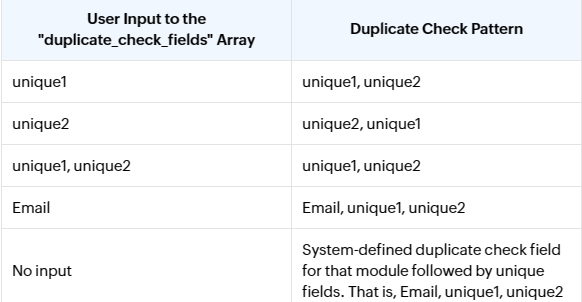


#### Sample JSON Input 


In [ ]:
{
    "data": [
        {
            "Last_Name": "Lead_changed",
            "Email": "newcrmapi@zoho.com",
            "Company": "abc",
            "Lead_Status": "Contacted",
            "Foreign_Languages": [ //multi-select picklist
                "Korean"
            ],
            "$append_values": {
                "Foreign_Languages": false
            }
        },
        {
            "Last_Name": "New Lead",
            "First_Name": "CRM Lead",
            "Email": "newlead@zoho.com",
            "Lead_Status": "Attempted to Contact",
            "Mobile": "7685635434",
            "Foreign_Languages": [ //multi-select picklist
                "Korean",
                "Spanish"
            ],
            "$append_values": {
                "Foreign_Languages": true
            }
        }
    ],
    "duplicate_check_fields": [
        "Email",
        "Mobile"
    ],
    "trigger": [
        "workflow"
    ],
    "apply_feature_execution": [
        {
            "name": "layout_rules"
        }
    ]
}

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "duplicate_field": "Email",
            "action": "update",
            "details": {
                "Modified_Time": "2020-10-14T10:31:43+05:30",
                "Modified_By": {
                    "name": "Patricia Boyle",
                    "id": "4150868000000225013"
                },
                "Created_Time": "2019-09-11T16:21:15+05:30",
                "id": "4150868000000376008",
                "Created_By": {
                    "name": "Patricia Boyle",
                    "id": "4150868000000225013"
                }
            },
            "message": "record updated",
            "status": "success"
        },
        {
            "code": "SUCCESS",
            "duplicate_field": null,
            "action": "insert",
            "details": {
                "Modified_Time": "2020-10-14T10:31:43+05:30",
                "Modified_By": {
                    "name": "Patricia Boyle",
                    "id": "4150868000000225013"
                },
                "Created_Time": "2020-10-14T10:31:43+05:30",
                "id": "4150868000003194003",
                "Created_By": {
                    "name": "Patricia Boyle",
                    "id": "4150868000000225013"
                }
            },
            "message": "record added",
            "status": "success"
        }
    ]
}

## Records (DELETE Method)
[Records (DELETE Method)](https://www.zoho.com/crm/developer/docs/api/v2/delete-records.html)

#### Purpose 
delete entities or records from a module 

#### Endpoints
    DELETE /{module_api_name}?ids={record_id1,record_id2,..}
    DELETE /{module_api_name}/{record_id}

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}?ids={record_id1,record_id2,..} 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible operation types:
    ALL - Full access to the record
    DELETE - Delete records in the module
- Parameters:
    - ids(string): id of the record you want to delete 
    - wf_trigger(boolean): if the workflow rules are to be triggered upon record deletion 

#### Sample Request


In [ ]:
def delete_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'ids': '3409643000002804002,3409643000002804003,3409643000002804004',
        'wf_trigger': 'true'
    }

    response = requests.delete(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

delete_records()


def delete_record():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002804003'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'wf_trigger': 'true'
    }

    response = requests.delete(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

delete_record()

#### Code Break Down 
This Python code defines a function, `delete_records()`, that makes a DELETE request to the Zoho CRM API to delete leads. Here's a breakdown:

1. `delete_records()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads'`: This line sets the URL for the Zoho CRM API endpoint that deletes leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `ids = ['3409643000002267003', '3409643000002267001']`: This line defines a list of IDs of the leads to be deleted.
   
   - `params = {'ids': ','.join(ids)}`: This line creates a dictionary with a key 'ids' and a value that is a string of the IDs to be deleted, separated by commas. This will be used as the query parameters for the DELETE request.
   
   - `response = requests.delete(url=url, headers=headers, params=params)`: This line sends a DELETE request to the URL specified, with the headers and query parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `delete_records()`: This line calls the `delete_records` function.

#### Sample Response:


In [ ]:
{
    "data": [
       {
            "code": "SUCCESS",
            "details": {
                "id": "410405000002264040"
            },
            "message": "record deleted",
            "status": "success"
        },
       {
            "code": "SUCCESS",
            "details": {
                "id": "410405000002264025"
            },
            "message": "record deleted",
            "status": "success"
        }
    ]
}

#### Possible Errors:
For possible Errors, refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/delete-records.html)

## Convert Lead (POST Method)
[Convert Lead (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/convert-lead.html)

#### Endpoints
    POST /Leads/{record_id}/actions/convert

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/Leads/{record_id}/actions/convert
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52, If-Modified-Since (this header to get records after a time stamp):  2019-07-25T15:26:49+05:30
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.leads.{operation_type}

- Possible Operation types
    ALL - Full access to the record
    WRITE - Edit records in the module
    CREATE - Create records in the module

#### Sample Request 


In [ ]:
def convert_lead():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002730081/actions/convert'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()
    record_object = dict()
    record_object['overwrite'] = True
    record_object['notify_lead_owner'] = True
    record_object['notify_new_entity_owner'] = True
    record_object['Accounts'] = '3409643000002730101'
    record_object['Contacts'] = '3409643000002730097'
    deals = {
        'Deal_Name': 'New Deal',
        'Closing_Date': '2020-12-10',
        'Amount': '500.50',
        'Stage': 'Closed Won'
    }
    record_object['Deals'] = deals

    record_list.append(record_object)

    request_body['data'] = record_list

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

convert_lead()

#### Code Break Down 
This Python code defines a function, `convert_lead()`, that makes a POST request to the Zoho CRM API to convert a lead. Here's a breakdown:

1. `convert_lead()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002730081/actions/convert'`: This line sets the URL for the Zoho CRM API endpoint that converts a lead. The ID of the lead to be converted is included in the URL.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object` is a dictionary that represents the details of the conversion. It includes keys like 'overwrite', 'notify_lead_owner', 'notify_new_entity_owner', 'Accounts', 'Contacts', and 'Deals'.
   
   - `deals` is a dictionary that represents a deal to be created as part of the conversion. It includes keys like 'Deal_Name', 'Closing_Date', 'Amount', and 'Stage'.
   
   - `record_object['Deals'] = deals`: This line adds the `deals` dictionary to the `record_object` under the key 'Deals'.
   
   - `record_list.append(record_object)`: This line adds the `record_object` to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `convert_lead()`: This line calls the `convert_lead` function.

#### Sample Input JSON

In [ ]:
{
    "data": [
        {
            "overwrite": true,
            "notify_lead_owner": true,
            "notify_new_entity_owner": true,
            "Accounts": "4150868000003283003",
            "Contacts": "4150868000003283024",
            "assign_to": "4150868000001248015",
            "Deals": {
                "Deal_Name": "Robert",
                "Closing_Date": "2020-07-24",
                "Stage": "Closed Won",
                "Amount": 56.6,
                "Pipeline": "Standard (Standard)",
                "Contact_Role": "5545974000000006873"
            },
            "carry_over_tags": {
                "Contacts": [
                    "tag1",
                    "tag2"
                ],
                "Accounts": [
                    "tag1"
                ],
                "Deals": [
                    "tag1"
                ]
            }
        }
    ]
}

#### Sample JSON Response 


In [ ]:
{
    "data": [
       {
            "Contacts": "4000000372131",
            "Deals": "4000000377192",
            "Accounts": "4000000373187"
        }
    ]
}

#### Possible Errors:
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/convert-lead.html)

## List of Deleted Records (GET Methods)
[List of Deleted Records](https://www.zoho.com/crm/developer/docs/api/v2/get-deleted-records.html)

#### Endpoints 
    GET /{module_api_name}/deleted

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/deleted
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52, If-Modified-Since: 2019-07-25T15:26:49+05:30 (this last part if you want records after a specified time stamp)
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types:
    ALL - Full access to the record
    READ - Get records in the module
- Parameters:
    - type(string): all (all deleted), recycle (records on recycle bin), permament (only permantently deleted records), 
    - page
    - per_page

#### Sample Request

In [ ]:
def get_list_of_deleted_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads/deleted'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'page': 1,
        'per_page': 30,
        'type': 'permanent'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_list_of_deleted_records()

#### Code Break Down
This Python code defines a function, `get_list_of_deleted_records()`, that makes a GET request to the Zoho CRM API to retrieve a list of deleted leads. Here's a breakdown:

1. `get_list_of_deleted_records()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads/deleted'`: This line sets the URL for the Zoho CRM API endpoint that retrieves deleted leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token. The 'If-Modified-Since' key is followed by a timestamp, and the server will only return leads that were deleted after this timestamp.
   
   - `parameters` is a dictionary that contains the query parameters for the GET request. 'page' and 'per_page' control the pagination of the results, and 'type' specifies the type of deletion (in this case, 'permanent').
   
   - `response = requests.get(url=url, headers=headers, params=parameters)`: This line sends a GET request to the URL specified, with the headers and query parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_list_of_deleted_records()`: This line calls the `get_list_of_deleted_records` function.


#### Sample JSON Response

In [ ]:
{
    "data": [
       {
            "deleted_by": {
                "name": "Patricia Boyle",
                "id": "410888000000086001"
            },
            "id": "410888000000099071",
            "display_name": "Patricia",
            "type": "recycle",
            "created_by": {
                "name": "Patricia Boyle",
                "id": "410888000000086001"
            },
            "deleted_time": "2015-06-19T11:19:38+05:30"
        },
       {
            "deleted_by": {
                "name": "Patricia Boyle",
                "id": "410888000000086001"
            },
            "id": "410888000000094004",
            "display_name": "Patricia",
            "type": "recycle",
            "created_by": {
                "name": "Patricia Boyle",
                "id": "410888000000086001"
            },
            "deleted_time": "2015-04-07T17:43:33+05:30"
        },
       {
            "deleted_by": null,
            "id": "410888000000680013",
            "display_name": null,
            "type": "permanent",
            "created_by": null,
            "deleted_time": "2016-10-26T11:44:15+05:30"
        },
       {
            "deleted_by": null,
            "id": "410888000000680009",
            "display_name": null,
            "type": "permanent",
            "created_by": null,
            "deleted_time": "2016-10-26T11:44:15+05:30"
        }
    ],
    "info": {
        "per_page": 200,
        "count": 4,
        "page": 1,
        "more_records": false
    }
}

#### Possible Errors 
For Possible Errors, refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-deleted-records.html)


## Search Records (GET Method)
[Search Records (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/search-records.html)

#### Purpose 
Retrieve records that match your search criteria 

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/search
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
    (and)
    scope=ZohoSearch.securesearch.READ
- Possible Operation types:
    ALL - Full access to the record
    READ - Get records from the module
- Endpoints:
    GET /search?criteria={criteria_here}
    GET /search?email={email_here}
    GET /search?phone={phone_number_here}
    GET /search?word={search_word_here}

#### Request Details: criteria 
- Request URL:https://www.zohoapis.com/crm/v2/{module_api_name}/search?criteria={{criteria_here}} for details on the chriteria refer to Request Details: [Criteria](https://www.zoho.com/crm/developer/docs/api/v2/search-records.html)

#### Sample Request search by Criteria



In [ ]:
def search_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads/search'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'criteria': '((Last_Name:starts_with:Last Name) and (Company:starts_with:fasf\\\\(123\\\\) K))',
        'email': 'newlead@zoho.com',
        'phone': '234567890',
        'word': 'First Name Last Name',
        'converted': 'both',
        'approved': 'both',
        'page': 1,
        'per_page': 15
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

search_records()

#### Code Break Down
This Python code defines a function, `get_list_of_deleted_records()`, that makes a GET request to the Zoho CRM API to retrieve a list of deleted leads. Here's a breakdown:

1. `get_list_of_deleted_records()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Leads/deleted'`: This line sets the URL for the Zoho CRM API endpoint that retrieves deleted leads.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token. The 'If-Modified-Since' key is followed by a timestamp, and the server will only return leads that were deleted after this timestamp.
   
   - `parameters` is a dictionary that contains the query parameters for the GET request. 'page' and 'per_page' control the pagination of the results, and 'type' specifies the type of deletion (in this case, 'permanent').
   
   - `response = requests.get(url=url, headers=headers, params=parameters)`: This line sends a GET request to the URL specified, with the headers and query parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_list_of_deleted_records()`: This line calls the `get_list_of_deleted_records` function.

#### Sample JSON Response search by criteria


In [ ]:
{
    "data": [
        {
            "Account": null,
            "Owner": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Company": "Company",
            "Email": "burns.mary@xyz.com",
            "$currency_symbol": "Rs.",
            "Visitor_Score": null,
            "Last_Activity_Time": "2019-02-19T12:05:23+05:30",
            "Industry": "ERP",
            "$converted": false,
            "$process_flow": false,
            "Street": "4 B Blue Ridge Blvd",
            "Zip_Code": "48116",
            "id": "3652397000000190367",
            "$approved": true,
            "$approval": {
                "delegate": false,
                "approve": false,
                "reject": false,
                "resubmit": false
            },
            "First_Visited_URL": null,
            "Days_Visited": null,
            "Created_Time": "2018-11-14T15:31:28+05:30",
            "$editable": true,
            "City": "Brighton",
            "No_of_Employees": 0,
            "Campaigns_Lookup": null,
            "State": "MI",
            "Country": "Livingston",
            "Last_Visited_Time": null,
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Annual_Revenue": 200000,
            "Secondary_Email": null,
            "Description": null,
            "Number_Of_Chats": null,
            "Rating": null,
            "Website": null,
            "Twitter": null,
            "Average_Time_Spent_Minutes": null,
            "Associated_Contacts": null,
            "Salutation": "Ms.",
            "First_Name": "Mary",
            "Lead_Status": "Contacted",
            "Full_Name": "Ms. Mary Burns",
            "Record_Image": null,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Skype_ID": "Mary-burns",
            "Phone": "555-555-5555",
            "Email_Opt_Out": true,
            "Designation": "Team Lead",
            "Modified_Time": "2019-02-19T12:05:23+05:30",
            "$converted_detail": {},
            "Mobile": "555-555-5555",
            "Prediction_Score": null,
            "First_Visited_Time": null,
            "Last_Name": "Burns,B",
            "Referrer": null,
            "Lead_Source": "Twitter",
            "Tag": [
                {
                    "name": "Pharma",
                    "id": "3652397000000371014"
                },
                {
                    "name": "Agricultural",
                    "id": "3652397000000371015"
                }
            ],
            "Fax": null
        }
    ],
    "info": {
        "per_page": 200,
        "count": 1,
        "page": 1,
        "more_records": false
    }
}

#### Request Details email

- request URL: 	
https://www.zohoapis.com/crm/v2/{module_api_name}/search?email={{email_here}}
- Attributes: email(string)

#### Sample request search by email

In [ ]:
def search_records_by_email(self):
    try:
        module_ins = zcrmsdk.ZCRMModule.get_instance('Contacts')
        resp = module_ins.search_records_by_email('steve@xyz.com')
        print(resp.status_code)
        resp_info = resp.info
        print(resp_info.count)
        print(resp_info.page)
        print(resp_info.per_page)
        print(resp_info.is_more_records)
        record_ins_arr = resp.data
        for record_ins in record_ins_arr:
            print(record_ins.entity_id)
            print(record_ins.created_by.id)
            print(record_ins.modified_by.id)
            print(record_ins.owner.id)
            print(record_ins.created_by.name)
            print(record_ins.created_time)
            print(record_ins.modified_time)
            print(record_ins.get_field_value('Email'))  # To get particular field value
        field_data = record_ins.field_data
        for key in field_data:
            print(key + ":" + str(field_data[key]))
            print("\n\n")
    except zcrmsdk.ZCRMException as ex:
        print(ex.status_code)  
        print(ex.error_message) 
        print(ex.error_code) 
        print(ex.error_details) 
        print(ex.error_content)

#### Code Break Down
 This Python code defines a function, `search_records_by_email()`, that uses the Zoho CRM SDK to search for contacts by email. Here's a breakdown:

1. `search_records_by_email()` function:

   - `module_ins = zcrmsdk.ZCRMModule.get_instance('Contacts')`: This line gets an instance of the 'Contacts' module from the Zoho CRM SDK.
   
   - `resp = module_ins.search_records_by_email('steve@xyz.com')`: This line calls the `search_records_by_email` method on the 'Contacts' module instance, passing in an email address. The response from the server is stored in the `resp` variable.
   
   - `print(resp.status_code)`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `resp_info = resp.info`: This line gets the information about the response and stores it in the `resp_info` variable.
   
   - The next four `print` statements print the count of records, the page number, the number of records per page, and whether there are more records, respectively.
   
   - `record_ins_arr = resp.data`: This line gets the data from the response (i.e., the records) and stores it in the `record_ins_arr` variable.
   
   - The `for` loop iterates over each record in `record_ins_arr`. For each record, it prints the entity ID, the IDs of the creator, modifier, and owner, the name of the creator, the creation time, the modification time, and the value of the 'Email' field.
   
   - `field_data = record_ins.field_data`: This line gets the field data from the last record and stores it in the `field_data` variable.
   
   - The second `for` loop iterates over each key in `field_data`. For each key, it prints the key and its corresponding value.
   
   - The `except` block catches any `ZCRMException` that is raised during the execution of the `try` block. If an exception is caught, it prints the status code, error message, error code, error details, and error content of the exception.



#### Sample JSON Response search by email

In [ ]:
{
    "data": [
        {
            "Account": null,
            "Owner": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Company": null,
            "Email": "newcrmapi@zoho.com",
            "$currency_symbol": "Rs.",
            "Visitor_Score": null,
            "Last_Activity_Time": "2019-03-22T11:10:55+05:30",
            "Industry": "ASP",
            "$converted": false,
            "$process_flow": false,
            "Street": "Street",
            "Zip_Code": "Zip_Code",
            "id": "3652397000000415002",
            "$approved": true,
            "$approval": {
                "delegate": false,
                "approve": false,
                "reject": false,
                "resubmit": false
            },
            "First_Visited_URL": null,
            "Days_Visited": null,
            "Created_Time": "2019-01-10T13:04:32+05:30",
            "$editable": true,
            "City": "City",
            "No_of_Employees": 100,
            "State": "State",
            "Country": "Country",
            "Last_Visited_Time": null,
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Annual_Revenue": 100000,
            "Secondary_Email": "newcrmapi@zoho.com",
            "Description": "Design your own layouts that align your business processes precisely. Assign them to profiles appropriately.",
            "Number_Of_Chats": null,
            "Rating": "Acquired",
            "Website": "crm.zoho.com",
            "Twitter": "Twitter",
            "Average_Time_Spent_Minutes": null,
            "Associated_Contacts": null,
            "Salutation": "Mr.",
            "First_Name": "First_Name",
            "Lead_Status": "Contacted",
            "Full_Name": "Mr. First_Name Last_Name",
            "Record_Image": null,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "3652397000000186017"
            },
            "Skype_ID": "Skype_ID",
            "Phone": "98883434559",
            "Email_Opt_Out": false,
            "Designation": "Designation",
            "Modified_Time": "2019-03-22T11:10:55+05:30",
            "$converted_detail": {},
            "Mobile": "98883434559",
            "Prediction_Score": null,
            "First_Visited_Time": null,
            "Last_Name": "Last_Name",
            "Referrer": null,
            "Lead_Source": "Twitter",
            "Tag": [],
            "Fax": "Fax"
        }
    ],
    "info": {
        "per_page": 200,
        "count": 1,
        "page": 1,
        "more_records": false
    }
}

#### Other Request Detail searches:

- Phone 
- word 

refer to the documentation 

## Records API Using External ID

refer to: [Records API Using External ID](https://www.zoho.com/crm/developer/docs/api/v2/records-api-ext-id-overview.html)

# Subform API

It is a secondary form or a table, taht enables you to inclue mutiple line items into a primary form, to associate multiple items to a single record. 

## Subform Data (GET Method)
[Subform Data (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/subforms.html)

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id} (or) https://www.zohoapis.com/crm/v2/{subform_api_name} || the second option is used for subforms 
- Supported Modules:
    - Leads 
    - Accounts
    - Contacts 
    - Deals
    - Campaigns 
    - Solutions 
    - Products 
    - Vendors
    - Custom
    - Notes 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types:
    ALL - Full access to a record
    READ - Get records in a module

#### Sample Request



In [ ]:
def get_subforms():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Subform_2'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'ids': '3409643000002804510,3409643000002804209',
        'fields': 'Last_Name,Email',
        'page': '1',
        'per_page': '10'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_subforms()


def get_subform():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Subform_2/3409643000002804510'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'fields': 'Last_Name,Email'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_subform()

#### Code Break Down
This Python code defines two functions, `get_subforms()` and `get_subform()`, that make GET requests to the Zoho CRM API to retrieve subforms. Here's a breakdown:

1. `get_subforms()` function:

   - `import requests`: This line imports the `requests` library, which is used for making HTTP requests.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Subform_2'`: This line sets the URL for the Zoho CRM API endpoint that retrieves subforms.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token. The 'If-Modified-Since' key is followed by a timestamp, and the server will only return subforms that were modified after this timestamp.
   
   - `parameters` is a dictionary that contains the query parameters for the GET request. 'ids' is a comma-separated list of subform IDs to retrieve, 'fields' is a comma-separated list of fields to include in the response, and 'page' and 'per_page' control the pagination of the results.
   
   - `response = requests.get(url=url, headers=headers, params=parameters)`: This line sends a GET request to the URL specified, with the headers and query parameters specified. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `get_subforms()`: This line calls the `get_subforms` function.

2. `get_subform()` function:

   - This function is very similar to `get_subforms()`, but it retrieves a single subform by ID instead of multiple subforms. The ID of the subform to retrieve is included in the URL.
   
   - The 'ids' parameter is not included in `parameters`, since the ID is specified in the URL.
   
   - `get_subform()`: This line calls the `get_subform` function.



#### Sample JSON Response: 


In [ ]:
{
    "data": [
        {
            "Owner": {
                "name": "Patricia Boyle",
                "id": "554023000000235011"
            },
            "Email": null,
            "$currency_symbol": "Rs.",
            "Other_Phone": null,
            "Mailing_State": null,
            "Other_State": null,
            "Languages": [
                {
                    "Proficiency": "Professional",
                    "$approval": {
                        "delegate": false,
                        "approve": false,
                        "reject": false,
                        "resubmit": false
                    },
                    "$currency_symbol": "Rs.",
                    "$process_flow": false,
                    "Languages_Known": "English",
                    "Parent_Id": {
                        "name": "Last_Name1",
                        "id": "554023000000298003"
                    },
                    "$editable": true,
                    "id": "554023000000473001",
                    "$approved": true
                },
                {
                    "Proficiency": "Native",
                    "$approval": {
                        "delegate": false,
                        "approve": false,
                        "reject": false,
                        "resubmit": false
                    },
                    "$currency_symbol": "Rs.",
                    "$process_flow": false,
                    "Languages_Known": "French",
                    "Parent_Id": {
                        "name": "Last_Name1",
                        "id": "554023000000298003"
                    },
                    "$editable": true,
                    "id": "554023000000473003",
                    "$approved": true
                }
            ],
            "Date_created": "2019-03-04",
            "Other_Country": null,
            "Last_Activity_Time": "2019-04-22T11:27:23+05:30",
            "Department": null,
            "$process_flow": false,
            "Assistant": null,
            "Mailing_Country": null,
            "id": "554023000000298003",
            "$approved": true,
            "Reporting_To": null,
            "$approval": {
                "delegate": false,
                "approve": false,
                "reject": false,
                "resubmit": false
            },
            "Other_City": null,
            "Created_Time": "2019-03-04T11:51:53+05:30",
            "$editable": true,
            "No_of_Employees": null,
            "Home_Phone": null,
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "554023000000235011"
            },
            "Secondary_Email": null,
            "Description": null,
            "Vendor_Name": null,
            "Mailing_Zip": null,
            "Twitter": null,
            "Other_Zip": null,
            "Mailing_Street": null,
            "Salutation": null,
            "First_Name": null,
            "Asst_Phone": null,
            "Full_Name": "Last_Name1",
            "Record_Image": null,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "554023000000235011"
            },
            "Skype_ID": null,
            "Phone": null,
            "Account_Name": null,
            "Email_Opt_Out": false,
            "Modified_Time": "2019-04-22T11:27:23+05:30",
            "Date_of_Birth": null,
            "Mailing_City": null,
            "Title": null,
            "Other_Street": null,
            "Mobile": null,
            "Territories": [],
            "Last_Name": "Last_Name1",
            "Lead_Source": "Advertisement",
            "Tag": [],
            "Fax": null
        }
    ]
}

#### Possible Errors
For Possible Errors refer to [Possible Error](https://www.zoho.com/crm/developer/docs/api/v2/subforms.html)

## Subform Data (POST Method)
[Subform Data (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/insert-subforms.html)

#### Purpose 
Insert a new record with subforms in a module 

#### Endpoints 
    POST /{module_api_name}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible operation types:
    ALL - Full access to a record
    WRITE - Edit records in a module
    CREATE - Create records in a module

#### Sample Request 


In [ ]:
def insert_subform_data():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Subform_1'

    headers = {
        'Authorization' : "Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268"
    }

    request_body = {}
    record_list = []

    record_object = {
        'fieldAPIName': 'fieldValue'
    }

    record_list.append(record_object)
    request_body['data'] = record_list

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

insert_subform_data()

#### Code Break Down 
This Python code defines a function, `insert_subform_data()`, that makes a POST request to the Zoho CRM API to insert data into a subform. Here's a breakdown:

1. `insert_subform_data()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Subform_1'`: This line sets the URL for the Zoho CRM API endpoint that inserts data into a subform.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object` is a dictionary that represents the data to be inserted into the subform. It includes a key-value pair where the key is 'fieldAPIName' and the value is 'fieldValue'. You should replace these with the actual field API name and value.
   
   - `record_list.append(record_object)`: This line adds the `record_object` to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `insert_subform_data()`: This line calls the `insert_subform_data` function.

#### Sample JSON Input 


In [ ]:
{
    "data": [
        {
            "Last_Name": "Contact_test",
            "Email": "contact_test@xyz.com",
            "Languages": [
                {
                    "Proficiency": "Native",
                    "Languages_Known": "English"
                },
                {
                    "Proficiency": "Professional",
                    "Languages_Known": "French"
                }
            ],
            "Availability":[
            	{
            		"Weekends":false,
            		"Weekdays":true
            	}]
        }
    ]
}

#### Sample Response 


In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "details": {
                "Modified_Time": "2019-04-23T16:57:01+05:30",
                "Modified_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                },
                "Created_Time": "2019-04-23T16:57:01+05:30",
                "id": "554023000000480721",
                "Created_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                }
            },
            "message": "record added",
            "status": "success"
        }
    ]
}

#### Possible Errors 
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/insert-subforms.html)

## Subform Data (POST Method)
[Subform Data (POST Method)](https://www.zoho.com/crm/developer/docs/api/v2/insert-subforms.html)

#### Purpose 
Insert a new record with subforms in a module 

#### Endpoints 
    POST /{module_api_name}

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possibloe Operation types: 
    ALL - Full access to a record
    WRITE - Edit records in a module
    CREATE - Create records in a module

#### Sample Request

In [ ]:
def insert_subform_data():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Subform_1'

    headers = {
        'Authorization' : "Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268"
    }

    request_body = {}
    record_list = []

    record_object = {
        'fieldAPIName': 'fieldValue'
    }

    record_list.append(record_object)
    request_body['data'] = record_list

    response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

insert_subform_data()

#### Code Break Down 
This Python code defines a function, `insert_subform_data()`, that makes a POST request to the Zoho CRM API to insert data into a subform. Here's a breakdown:

1. `insert_subform_data()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Subform_1'`: This line sets the URL for the Zoho CRM API endpoint that inserts data into a subform.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object` is a dictionary that represents the data to be inserted into the subform. It includes a key-value pair where the key is 'fieldAPIName' and the value is 'fieldValue'. You should replace these with the actual field API name and value.
   
   - `record_list.append(record_object)`: This line adds the `record_object` to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `response = requests.post(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `insert_subform_data()`: This line calls the `insert_subform_data` function.


#### Sample JSON Input

In [ ]:
{
    "data": [
        {
            "Last_Name": "Contact_test",
            "Email": "contact_test@xyz.com",
            "Languages": [
                {
                    "Proficiency": "Native",
                    "Languages_Known": "English"
                },
                {
                    "Proficiency": "Professional",
                    "Languages_Known": "French"
                }
            ],
            "Availability":[
            	{
            		"Weekends":false,
            		"Weekdays":true
            	}]
        }
    ]
}

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "details": {
                "Modified_Time": "2019-04-23T16:57:01+05:30",
                "Modified_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                },
                "Created_Time": "2019-04-23T16:57:01+05:30",
                "id": "554023000000480721",
                "Created_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                }
            },
            "message": "record added",
            "status": "success"
        }
    ]
}

#### Possible Errors 
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/insert-subforms.html)

## Subforms Data (PUT Method)
[Subforms Data(PUT Method)](https://www.zoho.com/crm/developer/docs/api/v2/update-subforms.html)

#### Purpose 
Update a record with subforms in a module 

#### Endpoints
    PUT /{module_api_name}

#### Request Details:

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Possible Operation types:
    ALL - Full access to a record
    WRITE - Edit records in a module
    UPDATE - Update records in a module

#### Sample Request 

In [ ]:
def update_subform_data():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Subform_1'

    headers = {
        'Authorization': "Zoho-oauthtoken 1000.cedfaf7fd202b809163e088f4243d155.df3e197b3aa89beab0cb12aa23de281f"
    }

    request_body = {}
    record_list = []

    record_object = {
        'id': '3409643000002804510',
        'fieldAPIName': 'fieldValue'
    }

    record_list.append(record_object)
    request_body['data'] = record_list

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_subform_data()

#### Code Break Down 
This Python code defines a function, `update_subform_data()`, that makes a PUT request to the Zoho CRM API to update data in a subform. Here's a breakdown:

1. `update_subform_data()` function:

   - `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.
   
   - `url = 'https://www.zohoapis.com/crm/v2/Subform_1'`: This line sets the URL for the Zoho CRM API endpoint that updates data in a subform.
   
   - The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.
   
   - `request_body = dict()`, `record_list = list()`: These lines initialize an empty dictionary and list, which will be used to build the request body.
   
   - `record_object` is a dictionary that represents the data to be updated in the subform. It includes a key-value pair where the key is 'id' and the value is the ID of the record to be updated, and another key-value pair where the key is 'fieldAPIName' and the value is 'fieldValue'. You should replace 'fieldAPIName' and 'fieldValue' with the actual field API name and value.
   
   - `record_list.append(record_object)`: This line adds the `record_object` to the `record_list`.
   
   - `request_body['data'] = record_list`: This line adds the `record_list` to the `request_body` under the key 'data'.
   
   - `response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))`: This line sends a PUT request to the URL specified, with the headers and data specified. The `json.dumps(request_body).encode('utf-8')` part converts the `request_body` dictionary to a JSON-formatted string and then encodes it to bytes. The response from the server is stored in the `response` variable.
   
   - The `if response is not None:` check is used to ensure that a response was received from the server.
   
   - `print("HTTP Status Code : " + str(response.status_code))`: This line prints the HTTP status code of the response. This can be useful for debugging if the request fails.
   
   - `print(response.json())`: This line prints the JSON body of the response. This should contain the response from the server if the request was successful.
   
   - `update_subform_data()`: This line calls the `update_subform_data` function.



#### Sample JSON Input 

In [ ]:
{
    "data": [
        {
            "id": "554023000000480721",//contact id
            "Languages": [
                {
                    "id": "554023000000480722"//id of the subform record that does not need any update
                },
                {
                    "id":"554023000000480787",//id of the subform record
                    "Proficiency": "Native",//data to be updated
                    "Languages_Known": "French"//data to be updated
                }
            ],
            "Availability": [
                {
                    "id": "554023000000480728"//id of the subform record that does not need any update
                },
                {
                    "id": "554023000000480728",//id of the subform record 
                    "Weekdays": false//data to be updated
                }
            ]
        }
    ]
}

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "details": {
                "Modified_Time": "2019-04-23T17:31:02+05:30",
                "Modified_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                },
                "Created_Time": "2019-04-23T16:57:01+05:30",
                "id": "554023000000480721",
                "Created_By": {
                    "name": "Patricia Boyle",
                    "id": "554023000000235011"
                }
            },
            "message": "record updated",
            "status": "success"
        }
    ]
}

#### Possible Errors 
For Possible Errors refer to: [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/update-subforms.html)

## Linking Module API
[Linking Module](https://www.zoho.com/crm/developer/docs/api/v2/linking-modules.html)


#### Linking Module API
Linking modules in Zoho CRM is a way to establish a relationship between two different modules. This is useful when you want to associate records from one module with records from another module. 

For example, you might have a "Contacts" module and a "Deals" module, and you want to link a specific contact to a specific deal. This can be done using the linking modules feature.

The Zoho CRM API provides several endpoints for working with linking modules:

1. **Get Linking Module Fields**: This endpoint retrieves the fields of a linking module. The fields are the data points that can be associated with a record in the linking module.

2. **Get Linking Module Records**: This endpoint retrieves the records of a linking module. The records are the actual data stored in the linking module.

3. **Insert Linking Module Records**: This endpoint inserts new records into a linking module. The records to be inserted are specified in the request body.

4. **Update Linking Module Records**: This endpoint updates existing records in a linking module. The records to be updated and the new data are specified in the request body.

5. **Delete Linking Module Records**: This endpoint deletes existing records from a linking module. The records to be deleted are specified in the request body.

Each of these endpoints requires an API request to be made to a specific URL, with certain headers and parameters. The exact details of these requests, including the required headers, parameters, and request body, are documented in the Zoho CRM API documentation.

#### Sample request linking a Contanct to a Deal 


In [ ]:
import requests
import json

# Define the URL for the linking module API endpoint
url = "https://www.zohoapis.com/crm/v2/Deals/{deal_id}/Contact_Roles"

# Define the headers for the API request
headers = {
    "Authorization": "Zoho-oauthtoken {access_token}",
    "Content-Type": "application/json"
}

# Define the data for the new linking module record
data = {
    "data": [
        {
            "Contact_Role": "Decision Maker",
            "Contact": {
                "id": "{contact_id}"
            }
        }
    ]
}

# Make the API request
response = requests.post(url, headers=headers, data=json.dumps(data))

# Print the response
if response.status_code == 200:
    print("Linking module record created successfully.")
else:
    print(f"Failed to create linking module record. Status code: {response.status_code}.")

#### Code Break Down 
This Python code is used to create a new record in a linking module in Zoho CRM. Here's a breakdown:

1. `import requests, json`: This line imports the `requests` and `json` libraries, which are used for making HTTP requests and handling JSON data, respectively.

2. `url = 'https://www.zohoapis.com/crm/v2/Deals/{deal_id}/Contact_Roles'`: This line sets the URL for the Zoho CRM API endpoint that creates a new record in a linking module. The `{deal_id}` placeholder should be replaced with the ID of the deal you want to link.

3. The `headers` dictionary contains the authorization information required by the Zoho CRM API. The 'Authorization' key is followed by a string that starts with 'Zoho-oauthtoken' and then the actual token.

4. `data` is a dictionary that represents the data for the new linking module record. It includes a key-value pair where the key is 'Contact_Role' and the value is 'Decision Maker', and another key-value pair where the key is 'Contact' and the value is a dictionary with the key 'id' and the value `{contact_id}`. You should replace `{contact_id}` with the ID of the contact you want to link.

5. `response = requests.post(url, headers=headers, data=json.dumps(data))`: This line sends a POST request to the URL specified, with the headers and data specified. The `json.dumps(data)` part converts the `data` dictionary to a JSON-formatted string. The response from the server is stored in the `response` variable.

6. The `if response.status_code == 200:` check is used to ensure that the request was successful. If the status code is 200, it prints "Linking module record created successfully." If not, it prints "Failed to create linking module record." along with the status code.


#### Sample Response 

In [ ]:
{
    "data": [
        {
            "details": {
                "modified_time": "2021-09-14T10:35:20+05:30",
                "modified_by": {
                    "name": "John Doe",
                    "id": "1000007095596"
                },
                "id": "1000007095600",
                "created_time": "2021-09-14T10:35:20+05:30",
                "created_by": {
                    "name": "John Doe",
                    "id": "1000007095596"
                }
            },
            "status": "success",
            "action": "insert",
            "message": "record added",
            "code": "SUCCESS"
        }
    ]
}

## Related Lists API

A record in a CRM system often encompasses more than just basic information. It can include supplementary details such as notes, attachments, and associated products. The Related Lists API is a tool that enables you to fetch all these interconnected elements, providing a comprehensive view of each record.

## Related Records Data (GET Method)
[Related Records Data (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-related-records.html)

#### Purpose 
Get the related list records 

#### Endpoints 
    GET /{module_api_name}/{record_id}/{related_list_api_name}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id}/{related_list_api_name}
- Supported relations: Notes, Attachments, Deals, Activities, Contacts, Accounts, Leads, Products, Vendors, Price Books, Quotes, Sales Orders, Purchase Orders, Invoices, Custom Modules, and more. 
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types: 
    ALL - Full access to related records
    READ - Read related records
- Parameters:
    - page(integer): to get the list of records from the respective pages 
    - per_page(integer): to get the list of records available per page 

#### Sample Request 


In [ ]:
def get_related_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'page': 1,
        'per_page': 2
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


get_related_records()


def get_related_record():
    import requests
    import os

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books/3409643000002414001'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    response = requests.get(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        if 'Content-Type' in response.headers:
            content_type = response.headers['Content-Type'].split(';')[0]

            if content_type == 'application/json':
                print(response.json())
            else:
                if 'Content-Disposition' in response.headers:
                    file_name = ''
                    content_disposition = response.headers['Content-Disposition']

                    if "'" in content_disposition:
                        start_index = content_disposition.rindex("'")
                        file_name = content_disposition[start_index + 1:]

                    elif '"' in content_disposition:
                        start_index = content_disposition.rindex('=')
                        file_name = content_disposition[start_index + 1:].replace('"', '')

                    destination_file = os.path.join('/Users/aswin-7455/Documents/SDK-workspace/latest-git-csez/python/latest/zohocrm-python-sdk', file_name)

                    with open(destination_file, 'wb') as f:
                        for chunk in response:
                            f.write(chunk)


get_related_record()

#### Code Break Down 
This Python code consists of two functions: `get_related_records()` and `get_related_record()`. Both functions are used to interact with the Zoho CRM API to fetch related records.

1. `get_related_records()`: This function fetches related records from a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch related records from the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token and a timestamp for fetching only records modified after a certain time.
   
   - It also sets parameters for pagination, specifying the page number and the number of records per page.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the JSON response.

2. `get_related_record()`: This function fetches a specific related record from a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch a specific record from the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token and a timestamp for fetching only records modified after a certain time.
   
   - It sends a GET request to the API endpoint with the headers, and stores the response.
   
   - If the response is not None, it prints the HTTP status code.
   
   - It then checks the 'Content-Type' of the response. If it's 'application/json', it prints the JSON response. If not, it checks if there's a 'Content-Disposition' header.
   
   - If there's a 'Content-Disposition' header, it extracts the file name from it and writes the response to a file with that name.

In both functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the product ID and related record ID in the URLs with the IDs of the product and related record you want to fetch.

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "Owner": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zylker.com"
            },
            "Modified_Time": "2020-07-26T15:26:58+05:30",
            "$attachments": null,
            "Created_Time": "2020-07-26T15:26:58+05:30",
            "Parent_Id": {
                "name": "patricia boyle",
                "id": "4150868000002737001"
            },
            "$editable": true,
            "$se_module": "Leads",
            "$is_shared_to_client": false,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zylker.com"
            },
            "$size": null,
            "$state": "save",
            "$voice_note": false,
            "id": "4150868000002738003",
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zylker.com"
            },
            "Note_Title": null,
            "Note_Content": "This is a sample note."
        }
    ],
    "info": {
        "per_page": 200,
        "count": 1,
        "page": 1,
        "more_records": false
    }
}

#### Possible Errors 
For Possible Errors refer to: [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-related-records.html)

## Related Records (PUT Method)
[Related Records (PUT Method)](https://www.zoho.com/crm/developer/docs/api/v2/update-related-records.html)

#### Purpose 
Update the relation between records 

#### Endpoints 
    PUT /{module_api_name}/{record_id}/{related_list_api_name}/{related_record_id}

#### Request Deatils 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id}/{related_list_api_name}/{related_record_id}
- Supported relations: 
    Campaigns - to - Leads, Contacts
    Products - to - Leads, Accounts,
    Contacts, Potentials, Price Books
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}

#### Sample Request to add the relation between a Lead and Campaigns

In [ ]:
def update_related_records():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()

    record_object_1 = {
        'id': '3409643000002414001',
        'list_price': 100.50
    }

    record_object_2 = {
        'id': '3409643000002414010',
        'list_price': 120.50
    }

    record_list.append(record_object_1)
    record_list.append(record_object_2)

    request_body['data'] = record_list

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_related_records()


def update_related_record():
    import requests
    import json

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books/3409643000002414001'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    request_body = dict()
    record_list = list()

    record_object = {
        'list_price': 100.50
    }

    record_list.append(record_object)

    request_body['data'] = record_list

    response = requests.put(url=url, headers=headers, data=json.dumps(request_body).encode('utf-8'))

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

update_related_record()

#### code Break Down 
This Python code consists of two functions: `update_related_records()` and `update_related_record()`. Both functions are used to interact with the Zoho CRM API to update related records.

1. `update_related_records()`: This function updates multiple related records in a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to update related records in the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It creates a list of dictionaries, each representing a record to be updated. Each dictionary includes the ID of the record and the new 'list_price'.
   
   - It wraps this list in a dictionary under the key 'data', and converts this dictionary to a JSON-formatted string.
   
   - It sends a PUT request to the API endpoint with the headers and the JSON data, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the JSON response.

2. `update_related_record()`: This function updates a specific related record in a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to update a specific record in the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It creates a dictionary representing the record to be updated, which includes the new 'list_price'.
   
   - It wraps this dictionary in a list, and then wraps this list in a dictionary under the key 'data', and converts this dictionary to a JSON-formatted string.
   
   - It sends a PUT request to the API endpoint with the headers and the JSON data, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the JSON response.

In both functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the product ID and related record ID in the URLs with the IDs of the product and related record you want to update.

#### Sample JSON Input 

In [ ]:
{
	"data":[
		{
			"id":"3652397000000327001",
			"Member_Status":"Active"
		
		},
		{
			"id":"3652397000001854001",
			"Member_Status":"Planning"
		
		}]
}

#### Sample JSON Response 

In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "details": {
                "id": "3652397000000327001"
            },
            "message": "relation added",
            "status": "success"
        },
        {
            "code": "SUCCESS",
            "details": {
                "id": "3652397000001854001"
            },
            "message": "relation added",
            "status": "success"
        }
    ]
}

#### Possible Errors 
For Possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/update-related-records.html)

## Delink Related Records (DELETE Method)
[Delink Related Records (DELETE Method)](https://www.zoho.com/crm/developer/docs/api/v2/delink.html)

#### Purpose 
delete the association between modules 

#### Endpoints 
    DELETE /{module_api_name}/{record_id}/{related_list_api_name}/{related_record_id}
    DELETE /{module_api_name}/{record_id}/{related_list_apiname}?ids={comma_separated_related_record_ids}

#### Request Deatils
- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id}/{related_list_api_name}/{related_record_id} or for multiple related records: https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id}/{related_list_api_name}?ids={comma_separated_related_record_ids}
- Supported relations:
    Campaigns - to - Leads, Contacts
    Products - to - Leads, Accounts,
    Contacts, Potentials, Price Books
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types: 
    ALL - Full access to records
    WRITE - Edit related records
    DELETE - Delete related records
- Parameters:
    id(string): comma separated related records IDs

#### Sample Request

In [ ]:
def delink_related_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'ids': '3409643000002414001,3409643000002414010'
    }

    response = requests.delete(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


delink_related_records()


def delink_related_record():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books/3409643000002414001'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.delete(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

delink_related_record()

#### Code Break Down 
This Python code consists of two functions: `delink_related_records()` and `delink_related_record()`. Both functions are used to interact with the Zoho CRM API to delete (delink) related records.

1. `delink_related_records()`: This function deletes multiple related records from a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to delete related records from the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It sets parameters for the request, specifying the IDs of the records to be deleted.
   
   - It sends a DELETE request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the JSON response.

2. `delink_related_record()`: This function deletes a specific related record from a specific module in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to delete a specific record from the 'Price_Books' related list of a specific product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It sends a DELETE request to the API endpoint with the headers, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the JSON response.

In both functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the product ID and related record ID in the URLs with the IDs of the product and related record you want to delete.

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "code": "SUCCESS",
            "details": {
                "id": "3652397000000925128"
            },
            "message": "relation removed",
            "status": "success"
        },
        {
            "code": "SUCCESS",
            "details": {
                "id": "3652397000000649013"
            },
            "message": "relation removed",
            "status": "success"
        }
    ]
}

#### Possible Errors 
For Possible Errors refer to: [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/delink.html)

# Related Records API Using External ID
The "Related Records API Using External ID" refers to a set of API endpoints provided by Zoho CRM that allow you to interact with related records using their external IDs. 

In Zoho CRM, an external ID is a unique identifier that you can use to refer to a record in an external system. For example, if you're integrating Zoho CRM with another system, you might use the ID from that system as the external ID in Zoho CRM. This allows you to easily match up records between the two systems.

The Related Records API allows you to fetch, create, update, and delete related records. By using the external ID, you can perform these operations without needing to know the internal ID that Zoho CRM assigns to the record. This can be particularly useful when you're working with data from another system.

Review the documentation [here](https://www.zoho.com/crm/developer/docs/api/v2/get-related-records-ext.html)

# Contact Roles API

When multiple contacts are associated with a deal/opportunity, the contacts' details are stored in the Contact Roles related list.

## Contact Roles (GET Method)
[Get Contact Roles](https://www.zoho.com/crm/developer/docs/api/v2/get-contact-roles.html)

#### Purpose 
Get the list of contact roles 

#### Endpoints
    GET /Contacts/roles
    GET /Contacts/roles/{contact_role_id}

#### Request Details: 
- Request URL: https://www.zohoapis.com/crm/v2/Contacts/roles (or) https://www.zohoapis.com/crm/v2/Contacts/roles/{contact_role_id} (for a specific role)
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.contacts.{operation_type}
- Possible Operation types:
    ALL - Full access to contacts
    READ - Read contacts

#### Sample Request 

In [ ]:
import requests

def get_contact_roles():
    url = 'https://www.zohoapis.com/crm/v2/Contacts/roles'
    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf'
    }

    response = requests.get(url, headers=headers)

    if response is not None:
        print(response.status_code)
        print(response.text)

get_contact_roles()

def get_contact_role():
    url = 'https://www.zohoapis.com/crm/v2/Contacts/roles/3409643000000026100'
    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf'
    }

    response = requests.get(url, headers=headers)

    if response is not None:
        print(response.status_code)
        print(response.text)

get_contact_role()

#### Code Break Down
This Python code consists of two functions: `get_contact_roles()` and `get_contact_role()`. Both functions are used to interact with the Zoho CRM API to fetch contact roles.

1. `get_contact_roles()`: This function fetches all contact roles from Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch contact roles.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It sends a GET request to the API endpoint with the headers, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body.

2. `get_contact_role()`: This function fetches a specific contact role from Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch a specific contact role.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It sends a GET request to the API endpoint with the headers, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body.

In both functions, replace the 'xxxxxxxxxxxxxx' in the authorization token with your actual token. Also, replace the contact role ID in the URL of the `get_contact_role()` function with the ID of the contact role you want to fetch.

#### Sample Response

In [ ]:
{
  "contact_roles": [
    {
      "sequence_number": 1,
      "name": "Purchasing",
      "id": "4150868000000006875"
    },
    {
      "sequence_number": 2,
      "name": "Engineering Lead",
      "id": "4150868000000006879"
    },
    {
      "sequence_number": 3,
      "name": "Economic Decision Maker",
      "id": "4150868000000006881"
    },
    {
      "sequence_number": 4,
      "name": "Product Management",
      "id": "4150868000000006883"
    }
  ]
}

#### Sample JSON Response 

In [ ]:
{
  "contact_roles": [
    {
      "sequence_number": 1,
      "name": "Purchasing",
      "id": "4150868000000006875"
    },
    {
      "sequence_number": 2,
      "name": "Engineering Lead",
      "id": "4150868000000006879"
    },
    {
      "sequence_number": 3,
      "name": "Economic Decision Maker",
      "id": "4150868000000006881"
    },
    {
      "sequence_number": 4,
      "name": "Product Management",
      "id": "4150868000000006883"
    }
  ]
}

#### Possible Errors 
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-contact-roles.html)

# Contact Roles API

## Get Contact Roles 
[Get Contact Roles](https://www.zoho.com/crm/developer/docs/api/v2/get-contact-roles.html)

#### Purpose 
get the list of contact roles 

#### Endpoints 
    GET /Contacts/roles
    GET /Contacts/roles/{contact_role_id}

#### Request Deatils:

- Request URL: https://www.zohoapis.com/crm/v2/Contacts/roles (or) https://www.zohoapis.com/crm/v2/Contacts/roles/{contact_role_id} | to get a specific role 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.contacts.{operation_type}
- Possible Operation types:
    ALL - Full access to contacts
    READ - Read contacts

#### Sample Request 

In [ ]:
import requests

def get_contact_roles():
    url = 'https://www.zohoapis.com/crm/v2/Contacts/roles'
    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf'
    }

    response = requests.get(url, headers=headers)

    if response is not None:
        print(response.status_code)
        print(response.text)

get_contact_roles()

def get_contact_role():
    url = 'https://www.zohoapis.com/crm/v2/Contacts/roles/3409643000000026100'
    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.8cb99dxxxxxxxxxxxxx9be93.9b8xxxxxxxxxxxxxxxf'
    }

    response = requests.get(url, headers=headers)

    if response is not None:
        print(response.status_code)
        print(response.text)

get_contact_role()

#### Sample JSON Response

In [ ]:
{
  "contact_roles": [
    {
      "sequence_number": 1,
      "name": "Purchasing",
      "id": "4150868000000006875"
    },
    {
      "sequence_number": 2,
      "name": "Engineering Lead",
      "id": "4150868000000006879"
    },
    {
      "sequence_number": 3,
      "name": "Economic Decision Maker",
      "id": "4150868000000006881"
    },
    {
      "sequence_number": 4,
      "name": "Product Management",
      "id": "4150868000000006883"
    }
  ]
}

#### Possible Errors 
For Possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-contact-roles.html)

# Blueprint API
The Blueprint API in Zoho CRM is used to manage and execute blueprints for records in a module. A blueprint is a visual representation of a business process, which can guide users through the expected steps of a process and ensure that all necessary actions are taken.

The Blueprint API provides several endpoints to interact with blueprints:

- The `GET /{module_api_name}/{id}/actions/blueprint` endpoint is used to get the next available transitions for a record. This can be useful to guide users through the steps of a process, by showing them what actions they can take next.

- There are also endpoints to execute transitions, which move a record from one state to another in the blueprint.

By using the Blueprint API, you can integrate your business processes directly into Zoho CRM, ensuring that users follow the correct procedures and that all necessary actions are taken.


## Blueprint Details (GET Method)
[Blueprint Deatils(GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/blueprint-details.html)

#### Purpose 
Get the next availabe transitions for the record. 


#### Endpoints 
    GET /{module_api_name}/{id}/actions/blueprint

#### Request Details 

- Request URL: https://www.zohoapis.com/crm/v2/{module_api_name}/{id}/actions/blueprint
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
- Possible Operation types:
    ALL - Full access to records
    READ - Get records from a module

#### Sample Request


In [ ]:
def delink_related_records():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'ids': '3409643000002414001,3409643000002414010'
    }

    response = requests.delete(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())


delink_related_records()


def delink_related_record():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Products/3409643000000798007/Price_Books/3409643000002414001'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    response = requests.delete(url=url, headers=headers)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

delink_related_record()

#### Code Break Down 
This Python code consists of two functions: `delink_related_records()` and `delink_related_record()`. Both functions interact with the Zoho CRM API to delete (delink) related records.

1. `delink_related_records()`: This function delinks multiple related records from a product.

   - It first sets the URL for the API endpoint, which is used to delink related records from a product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It also defines the parameters for the API request, which include the IDs of the related records to be delinked.
   
   - It sends a DELETE request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body.

2. `delink_related_record()`: This function delinks a specific related record from a product.

   - It first sets the URL for the API endpoint, which is used to delink a specific related record from a product.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It sends a DELETE request to the API endpoint with the headers, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body.

In both functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the product ID and related record IDs in the URLs and parameters with the actual IDs.

#### Sample JSON Response
The response is too long please refer to [JSON Response](https://www.zoho.com/crm/developer/docs/api/v2/blueprint-details.html)

#### Possible Errors 
For Possible Errors please refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/blueprint-details.html)

# Variables API

The Variables API in Zoho CRM allows you to manage and interact with variables in your Zoho CRM account. Variables in Zoho CRM are custom fields that can store data which can be used across multiple modules. They can be used to store information that is frequently used, such as company details, tax information, or other common data.

Here are some of the key features of the Variables API:

- **List all Variables**: You can fetch all the variables in your Zoho CRM account. This can be useful to get an overview of all the variables and their values.

- **Get Variable by ID**: You can fetch a specific variable by its ID. This can be useful when you want to get the details of a specific variable.

- **Create Variables**: You can create new variables in your Zoho CRM account. This can be useful when you want to store new information that can be used across multiple modules.

- **Update Variables**: You can update the value of a variable. This can be useful when the information stored in a variable changes.

- **Delete Variables**: You can delete a variable when it is no longer needed.

By using the Variables API, you can automate the management of variables in your Zoho CRM account, making it easier to store and update common information.

## Variables Data (GET Method)
[Variables Data(GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-variables.html)

#### Purpose 
Retrieve all the availabe variables through an API request 

#### Endpoints
    GET /settings/variables
    GET /settings/variables/{variable_id}?group={variable_group_id}

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/settings/variables (or) https://www.zohoapis.com/crm/v2/settings/variables/{variable_id}?group={variable_group_id} | for a specific variable 
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: scope=ZohoCRM.settings.variables.{operation_type}
- Possible Operation types:
    ALL - Full access to variable data
    READ - Get variable data
- Parameters:
    - group(string): the unique ID of the group which the variable belongs to 

#### Sample Request

In [ ]:
def get_variables():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/variables'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'group': 'General'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_variables()


def get_variable():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/settings/variables/3409643000002280002'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'group': 'General'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_variable()

#### Code Break Down
This Python code consists of two functions: `get_variables()` and `get_variable()`. Both functions interact with the Zoho CRM API to fetch variables.

1. `get_variables()`: This function fetches all variables from a specific group in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch variables.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It also defines the parameters for the API request, which include the group of variables to be fetched.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body in JSON format.

2. `get_variable()`: This function fetches a specific variable from Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch a specific variable.
   
   - It then defines the headers for the API request, including the authorization token.
   
   - It also defines the parameters for the API request, which include the group of the variable to be fetched.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body in JSON format.

In both functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the variable ID in the URL of the `get_variable()` function with the ID of the variable you want to fetch. 

#### Sample JSON Response

In [ ]:
{
  "variables": [
    {
      "api_name": "sample1",
      "name": "SV1",
      "description": "This is a sample variable.",
      "id": "4150868000002146001",
      "type": "text",
      "variable_group": {
        "api_name": "General",
        "id": "4150868000000597005"
      },
      "value": ""
    },
    {
      "api_name": "sample2",
      "name": "SV2",
      "description": null,
      "id": "4150868000002517007",
      "type": "long",
      "variable_group": {
        "api_name": "General",
        "id": "4150868000000597005"
      },
      "value": ""
    },
    {
      "api_name": "sample3",
      "name": "SV3",
      "description": null,
      "id": "4150868000002517005",
      "type": "textarea",
      "variable_group": {
        "api_name": "General",
        "id": "4150868000000597005"
      },
      "value": ""
    },
    {
      "api_name": "Sample4",
      "name": "SV4",
      "description": null,
      "id": "4150868000002517003",
      "type": "datetime",
      "variable_group": {
        "api_name": "General",
        "id": "4150868000000597005"
      },
      "value": ""
    }
  ]
}

#### Possible Errors 
For possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-variables.html)

# Notes API
The Notes API in Zoho CRM allows you to manage and interact with notes in your Zoho CRM account. Notes in Zoho CRM are used to add comments or descriptions to records in various modules. They can be used to store additional information about a record, such as call logs, meeting notes, or other details.

Here are some of the key features of the Notes API:

- **List all Notes**: You can fetch all the notes associated with a specific record or module. This can be useful to get an overview of all the notes and their content.

- **Get Note by ID**: You can fetch a specific note by its ID. This can be useful when you want to get the details of a specific note.

- **Create Notes**: You can create new notes and associate them with a specific record or module. This can be useful when you want to add additional information to a record.

- **Update Notes**: You can update the content of a note. This can be useful when the information in a note changes.

- **Delete Notes**: You can delete a note when it is no longer needed.

By using the Notes API, you can automate the management of notes in your Zoho CRM account, making it easier to store and update additional information about records.


## Notes Data (GET Method)
[Notes Data (GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-notes.html)

#### Purpose 
get the list of notes 

#### Endpoints
    GET /Notes
    GET /Notes/{note_id}
    GET /{module_api_name}/{record_id}/Notes

#### Request Details

- Request URL: https://www.zohoapis.com/crm/v2/Notes (or) https://www.zohoapis.com/crm/v2/Notes/{note_id} (for a specific note) (or) https://www.zohoapis.com/crm/v2/{module_api_name}/{record_id}/Notes (to get notes from a specific record)
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope: 
    scope=ZohoCRM.modules.ALL
    (or)
    scope=ZohoCRM.modules.{module_name}.{operation_type}
    (and)
    scope=ZohoCRM.modules.notes.{operation_type}
- Parameters: (all optional)
    - page(number)
    - per_page(number)
    - fields(string)
    - sort_order(string) 
    - sorty_by

#### Sample Request 



In [ ]:
def get_notes():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Notes'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'page': 1,
        'per_page': 30,
        'fields': 'Created_Time,Parent_Id'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_notes()


def get_note():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Notes/3409643000003278008'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'fields': 'id,Parent_Id'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_note()

def get_notes_of_a_specific_record():
    import requests

    url = 'https://www.zohoapis.com/crm/v2/Leads/3409643000002267003/Notes'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
        'If-Modified-Since': '2020-03-19T17:59:50+05:30'
    }

    parameters = {
        'page': 1,
        'per_page': 2,
        'fields': 'Created_Time,Parent_Id'
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_notes_of_a_specific_record()

#### Code Break Down 
This Python code consists of three functions: `get_notes()`, `get_note()`, and `get_notes_of_a_specific_record()`. All three functions interact with the Zoho CRM API to fetch notes.

1. `get_notes()`: This function fetches all notes from Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch notes.
   
   - It then defines the headers for the API request, including the authorization token and the 'If-Modified-Since' header.
   
   - It also defines the parameters for the API request, which include the page number, the number of notes per page, and the fields to be fetched.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body in JSON format.

2. `get_note()`: This function fetches a specific note from Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch a specific note.
   
   - It then defines the headers for the API request, including the authorization token and the 'If-Modified-Since' header.
   
   - It also defines the parameters for the API request, which include the fields to be fetched.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body in JSON format.

3. `get_notes_of_a_specific_record()`: This function fetches all notes associated with a specific record in Zoho CRM.

   - It first sets the URL for the API endpoint, which is used to fetch notes of a specific record.
   
   - It then defines the headers for the API request, including the authorization token and the 'If-Modified-Since' header.
   
   - It also defines the parameters for the API request, which include the page number, the number of notes per page, and the fields to be fetched.
   
   - It sends a GET request to the API endpoint with the headers and parameters, and stores the response.
   
   - If the response is not None, it prints the HTTP status code and the response body in JSON format.

In all functions, replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token. Also, replace the note ID and record ID in the URLs with the actual IDs.

#### Sample JSON Response

In [ ]:
{
    "data": [
        {
            "Owner": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zohocorp.com"
            },
            "Modified_Time": "2020-07-28T11:58:59+05:30",
            "$attachments": null,
            "Created_Time": "2020-07-28T11:55:47+05:30",
            "Parent_Id": {
                "name": null,
                "id": "4150868000002567076"
            },
            "$editable": true,
            "$se_module": "Leads",
            "$is_shared_to_client": false,
            "Modified_By": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zohocorp.com"
            },
            "$size": null,
            "$state": "save",
            "$voice_note": false,
            "id": "4150868000002748029",
            "Created_By": {
                "name": "Patricia Boyle",
                "id": "4150868000000225013",
                "email": "patricia.b@zohocorp.com"
            },
            "Note_Title": "Contacted",
            "Note_Content": null
        }
        
    ],
    "info": {
        "per_page": 200,
        "count": 1,
        "page": 1,
        "more_records": false
    }
}


#### Possible Errors 
For Possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-notes.html)

# Tags API
The Tags API in Zoho CRM allows you to manage and interact with tags in your Zoho CRM account. Tags in Zoho CRM are used to categorize records in various modules based on common characteristics. They can be used to easily filter and search for records.

Here are some of the key features of the Tags API:

- **List all Tags**: You can fetch all the tags in your Zoho CRM account. This can be useful to get an overview of all the tags and their usage.

- **Get Tag by ID**: You can fetch a specific tag by its ID. This can be useful when you want to get the details of a specific tag.

- **Create Tags**: You can create new tags in your Zoho CRM account. This can be useful when you want to categorize new records.

- **Update Tags**: You can update the details of a tag. This can be useful when the information related to a tag changes.

- **Delete Tags**: You can delete a tag when it is no longer needed.

By using the Tags API, you can automate the management of tags in your Zoho CRM account, making it easier to categorize and find records.

## Tags List (GET Method)
[Tags List(GET Method)](https://www.zoho.com/crm/developer/docs/api/v2/get-tag-list.html)

#### Purpose 
display all the tags in an organization 

#### Endpoints 
    GET /settings/tags?module={module_api_name}

#### Request Details

- Request URL: http://www.zohoapis.com/crm/v2/settings/tags?module={module_api_name}
- Header: Authorization: Zoho-oauthtoken d92d4xxxxxxxxxxxxx15f52
- Scope:
    scope=ZohoCRM.settings.ALL
    (or)
    scope=ZohoCRM.settings.tags.{operation_type}
- Possible Operation types:
    ALL - Full access to tags
    READ - Get tag details
- Parameters:
    - module(string): name of the module 
    - my_tags(boolean optional): tags created by the current user

#### Sample Request
 

In [ ]:
def get_tags():
    import requests

    url = 'http://www.zohoapis.com/crm/v2/settings/tags'

    headers = {
        'Authorization': 'Zoho-oauthtoken 1000.04be928e4a96XXXXXXXXXXXXX68.0b9eXXXXXXXXXXXX60396e268',
    }

    parameters = {
        'module': 'Leads',
        'my_tags': 'true',
    }

    response = requests.get(url=url, headers=headers, params=parameters)

    if response is not None:
        print("HTTP Status Code : " + str(response.status_code))

        print(response.json())

get_tags()

#### Code Break Down
This Python code defines a function `get_tags()` that fetches all tags from the 'Leads' module in Zoho CRM.

Here's a breakdown of the code:

1. The `requests` library is imported, which is used for making HTTP requests.

2. The URL for the Zoho CRM Tags API endpoint is defined.

3. The headers for the API request are defined, including the authorization token. The 'Zoho-oauthtoken' should be replaced with your actual token.

4. The parameters for the API request are defined. The 'module' parameter is set to 'Leads', which means the function will fetch tags from the 'Leads' module. The 'my_tags' parameter is set to 'true', which means the function will fetch only the tags created by the authorized user.

5. A GET request is sent to the API endpoint with the defined headers and parameters, and the response is stored.

6. If the response is not None, the HTTP status code and the response body in JSON format are printed.

The `get_tags()` function is then called to execute the code. 

Remember to replace the 'XXXXXXXXXXXXX' in the authorization token with your actual token.

#### Sample JSON Response

In [ ]:
{
    "tags": [
       {
            "created_by": {
                "id": "2000000030444",
                "name": "Construction Industry"
            },
            "created_time": "2017-03-24T11:08:23+05:30",
            "id": "2000000039007",
            "modified_by": {
                "id": "2000000030444",
                "name": "Chems"
            },
            "modified_time": "2017-03-24T11:08:23+05:30",
            "name": "Chemical Industry"
        }
    ],
    "info": {
        "allowed_count": 50,
        "count": 1
    }
}

#### Possible Errors
For Possible Errors refer to [Possible Errors](https://www.zoho.com/crm/developer/docs/api/v2/get-tag-list.html)

# Photos & Attachements API

# Mass Update API

# Currencies API

# Files API

# Share API